In [2]:
%config Completer.use_jedi = False

In [3]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
import signal

In [4]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

In [ ]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False
while is_capturing:
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview.set_data(frame)
    plt.draw()

    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass
    if is_interrupted:
        vc.release()
        break

In [ ]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import cv2
import base64

def arrayShow (imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))
video = cv2.VideoCapture(0)
while(True):
    try:
        clear_output(wait=True)
        _, frame = video.read()
        lines, columns, _ =  frame.shape
        frame = cv2.resize(frame, (int(columns/4), int(lines/4))) 
        img = arrayShow(frame)
        display(img)
    except KeyboardInterrupt:
        video.release()

FileNotFoundError: No such file or directory: 'iVBORw0KGgoAAAANSUhEUgAAAKAAAAB4CAIAAAD6wG44AAAgAElEQVR4AUTBb49u532e5/O61zOzSYqSIyWOXCEFiiaNDSdpkfdBXvQzt0C/S4ECdWxJFLk39/+Zedb9u86uoQvkOPLj1/s2YsrYYDsdix3aAZW2MFyasQGqVtTgCLUoyhwV0e5EO6ISsUFlaE2Wjrsag2JrAG071QRbHUlcqdrpgt2gi2lTLXrgnoYV0k6gjs50zK3dR7rb8MZWNhXW4IFaHaG2Hts5POVo52xvtB6Hhy2ezVJr0W0XOWcJ8Yytbs96ZLCLuDkjFFlTyF3PsPSms3vIql/iUW7LE8+7a3Gg0nhuVr09YJ0TWtK11izd5e6srHgmaxrqDguWzQ9Pp4pRt+Mr2tppVdBKO6GR1ljBpo6RHjpQbKus1IJObBXSqbqwbSBSds2SbYXOHFyqywY6bjGUqsRLlRotptEKTZdSi1Mz7kU1gBbmHBaBQPc0eKB15AjbysJWbUVwC/uZrOWx6cG0hyGj7LI6G6qMq60XxI3uok2XtEZGB6WMGYHihEs6Gc5yWEOBdE6PQqyvgNEOt5sWyp4CxzhHbJFZHtJw7BlZjVWb/PB0VlGbQW1qa51q7SVgC2htYoFiW5porVoGo4ltFS9gB1Aa2PVQrKBSLxHZZbWzTHw1iFuLLI8tuuFIq1soeEGHpWek+IslcrmXtEfYo7SrHS5KqgexOS1OcLm0amNbX80hxNOk4NSU2b3koBdJdJwFHXA3axd5piqIU3jcnrhisYPbklmzNmsTRtJwph7e7gwqtz3CaWhWSuqANBxnz3DETkpBhow9QhSjzQ9PJ9DWRqodL8wM2NY2LB0VL1Rj0HbXaEPRKkIpRSPqYFteidAGqlWsggF1p6sdLlpfkVIideorWGUoYBSYRjZjE632sog0TIsN4TIzie3ADSOTbjhORnc0XRqtmsW04uos1tZhOsCSbY+2YeyI8RgXOr2HjnYWdphK63Jtz3DXo9aueAC7Y6blUneTpY6QUllTg2jIHQNtl4FNjzslPWzt9HhgFbYVAy2x+eHpVEahqLVlnBqdzkTGLlBRi7C8MLY0LpzV2VIvxOjURoYuoU1iGYoecnYAFUiroG0TKu1gIaCtpo5WDpEKHjpI2bHO8rCDG9gGx6h01sFFe0ojYdq0GQQl6mEtotQCi8w4S7ceyW7TmKId0DbTyi6ZYbni86a6rLujWyNgHUjxaCuz9TBbgsWZkLYrjJo6MMUUEg2MDh61pvGxPXXiOXPkaKRr6XTfu1g9Bpj88HQqYDuVmDq1l9TpVC5tAZW64SZeKhTXuBdMwctGRnEtj3qWHamJyKCR3QH8xfJVq4Ijq53AosLIVBxsPEAz1VWLUw8P2cXUiqgTGKlpXZn4asPRAq0mUxfVjobVsnStmVFDStdkSm/k3LNAIrj3hg5yCT2tmnrvmGS66yDVkSlaqD0U6HYfUkHEusqktrdNV0bIiZmmZmUGUmMLx3Zu7l1JBhLP6rhWbMdTDk7W0fz4dCJjx0CntS4ZR+3QS0pbFaJ2BWSW1lqVqYvVDhGJDGUKovUSUOsvUrXFy2GqMioFogPTroGj265hjtQetbIBLbYe6SSVtGqAvooLWzQhcwqVrYBG0dG9MvTAWxndicqUxUKHLJkkrZyDh704qZU7PtrL1uzep8fqFl4KKtrGdXpCY2YkDW0prLKxTHqTYiraTY8SfUpvLN0ae9getMx9WEA6rRx7NIM7Xg6aOmTyl6ddbIsGzhllyThqW3V0+QpoSwloubSFGqyonWlI6EiGV460grRVE1pRLDRiI+jYMYt2MWcpuTHT4NSBW2wdLopuqsXgwhOOVlCJU6lZhG5hw9K2CVrbUZjkFjOeOnE1WVmdjq5MoJrp5Bg4an8xTOdMb8C0neqLTV1ie44NbS3ZXVA6kDgVQWc3kLjbGDq80okiw7BQqdauUbtj1ULCTCWdmhlCQ/ZhZmZDfnjaRVs02lrUVuxYLeOovJJxEFhqLyTW4KQCezRFkUtnIGCd1SIDC0emvHKr6VKXU6agLLMtRSvTrjALgWmkOmi8DdNOsF1QNJA25k6hC8diaACxNhI9LbKgcWv0kGHxanTHI3HaGrLsxkLds5tRptopbXSOnOe23mS6d3PZNPdS1DpzJGd7k42DVFhuXdRaUjeZdNUqEV+s01WWRVoHk+6QNrWnp5E6ZJWw2uTPT3dErWjV+ItevNROC6SCrRcgSB0LxUXFCrtFo0AVRwO2Bew0rnZcGAsxbst2H0lrQVlSSkengMEqYbVDsBOpa9l2CKdF0BCZFldWtdZJoCRY2gok9JUJWEtSezlypMKWyCVtcGDX2TX9xdCm7VRd7Ymz95Rb2TM1xB3XrlXbkHrucpPJDFI1Mdoc2ZuYOpOhTEMW7namjWLB8dV0EhTLNkKmNcPORfPD80bbCmhbpRelaafsVdsCSpGq4AXYEG0KTKtl0khMfUUbKtRMBW0PUarFZYcCaesAacoaT5VLDcUqJQtGbdGyfLXBmLawbFZ25aJjb3iXGbOCXWLtMrhhldrVDGy8hUt0Qq1IQ7TozJ5dbGfEvZ11v788vZx7tu24ITqxcNhoWepSNt4IzLQHC6basFjbgNoWzHaGLm+rc9aGpL2jlEKpbQkbV9HiYJXtSrI7g/nxeYvTKpTtLMx0fNV22loFvKT4i2KsgugGWhQxmlYEdgFjY9Htag1eilQ0ioLB1qFpheIF7TQrKb3AiuiISIurNlbQWKQL6MglpxMLrcISMRTYunUFqhDouA5tWjlMMOHuIG2RdoY99dzz9dOHOfvH//bHz18/TfvrX/26a9a6Hcni8lhcBHpbkexbSB5QjoPjyLldm3XEuleO3crCo953xcTns6scqUfX7gtk69DladdGDAqhAsWC9SB5+3wq0w6kjNVGUbrvxUuLr4B2rAmDFEgt1naVAkpraglrt2rWRmwUZTnDRDsHS5y2EchMYQBFqBOhjk1WWzDOcFiPtJ1NkDVJLKMiiw5JFW2wZmZu5KW6mmZhzFBppMnRFky2TdzJathk6UzHDWx3Zr759vuXr/v9h7cf339Y683/+X/9H//yt98dLnJ88+2vvvnm8c3Dt3m8HXYdOeGWtY5MXeu2jnVb6cpDbhqwoaCBTAe0bBvKlFmsrunp2p14oWIaXeS5CnXUVUJMUUjePp+YmSEptmpRq927wWrVXmjEKlHaQQE7K3ZoWG29gEKnaFaKU5eOZgmc7dLgCSr+d9XCqiVQ0pSXQghVES9YoIpGRKyuGpiBQ+slNDDTJBQzu9RkVaBKRoHYJNRJdnuQRbvovTuA/dVvf/v9t79+fnr++e3P79+/+/Tp6/PT8+evnz59/OmP//An9fCWNXm8PT5+/+3Deni8eax1HISVtW4Pye1hLdYtOY71AimrOeTS1pC6p45Ylxn2muIx0F0wDMluY86So3G3hYcVldaxefu88cL2VQp03DbbSbXWjtWqKYJim6TSGe3BKqU9RGczOrA6sHQa0BWnnSTtktGitREv2BIiHbQcorPtShxviD1FDZa9iP8/EARs04xGW00lMJBYpazdpjIYOaaEV/Fsb/IqGZJO4q4tK/O73//r777/zf3lfP7y9f37nz+8//Dx/ceXL1+/PD+9vDz/6Y//7evHD22EoY+sdeT28P3jmzysN745jvX47e3gFm5vHhfHeujR0hvHrIfW5Wlu46hMx4x7Cax2tLtNV62rNzrti+twLdCK6EZckbF5+7x9xaCW4VJnGlpsO8NQ/1lMrdo2pF5au5oBNBnbWI0G1GlHQhuxZNnRoI3UilYEWwyHipVtneYIraQ4LUdutbaKab2s2GoARwuxyuweCasjbgkLRlmuyUyLC1hMYEroTQibNb0ncWhdh//ub/9u2/Pl5fOXpy8fPr57++7D+/cvX58+ff3y8vz0+ePPP/zxH1tryqq9HdDH3Hrk8fbN7bi9+dU3Dw+3b4/HN4+reUjWwlvXsRJTL70NMz1Xes5ODyDtOMMlU9TQU1seTRFftQoRliOOefe8Tz1ILV6WHZiZ1KrtrqPTRljSqlXrBTSYWl+tdCoW0oIDaesFcBZaqwOphHTXY/BwKwO6wo5U994ribehusmsLoiyRXtjbHVVCWI1No6sDgmn2lmIJEyPZvBSRbOcBeqGyDIJ5pyuWoT2d//6t7//H/7N7n5+fvr6+fnLp88f3n34+d3Pnz58uH/9et/39x8//PnP/zjdbbQ1QOphXEfW8fj48N2vvvnm8ZvHb75xHes41u046FoPE2HZ1dU1dLoW537ZjCvj3JoWYVNnLSec92GxCGNj2yS3hrqjTvLueVcCp11asUWr2HZa29HxQpC2GpVWqi6WrWk7gUrKpUyHS1slVCegaQuNDlIWGRsdG0cXwU4VfwExEak4IiBWWDpxLAvEodQVqjMeB2fpzBEqy+pK7FhmVFgECwgKNBiqqW1t+zd/+Jvf//5vpr7c9+evXz9//Pj+3bt3P31499OPn95/2r0/3b/+9MOf9n5pgx4ehbE2kmOtx9vjt999++abbx/fPN4ejhzruD2QZK1kyGObeh6lTmv1tITpPLA6Sk9PezsqeJJomXEfuc2YHGZat0Xy08tWUoOOxYJtNdp2io5OFaNVqeMgUFubBjRVusBW0E0P2ZraiI4KS4d6GTnUUAcdqyJHsqf11QLtCqgE22bDzdSpCosZwxAubWWNM5u1kLJxAT2Gro4s3dItt9yg46yuwYgOkdi6ipf04c3Dv/1f/va4Pcw+P31++vT+/c/v3v3449u3P7199/b9y9fP4vsPP+05keWa7qkFzO243dbxcHvz+O133zw83N48cOQ4bsfDbS1WHoMnAaXj3Fpnxt6LRgaTWqKzZ6qHJik5ZwKi3WHBst2ZzsoPzyeCHl6octE9I7ZecNqpaNKio7V4mQDNOIH6ahm1oiy3TI02/jMwsv1FOrIm4BzSpliLbYMFhYUjbYM6B45ZHtuR4Cyq7BJYOibUOkmGrHmZHdZhtQvKqoPLrEyHlyGHj2XHiiXAsoqvup3/9L/95zdv3jjz/sPHt2/f/vz27buf3r796e3Pf3n76eM7coAne62V8Q6HJmYlPiS3h9vtzcOR44EjOW7HuuXYicljoiYopXN6nHU6VILbRLyfFZixBqKukPZuz20OwWMO6pk9XfnL06kGIihWKdBWa1+pLfUCU9JOqtCORLmVbUEUSzIzEDqCUg2l9oILqlIcG4UQ28GgE0cPcKy6UHkldevE2GMsr6qja8whB74Ku00z1EycEk0cjF2prKlOIYrYWKHNJjdOuyCgbs2//7u/+/ZXvzrPl88fPr/7+ee3P/70/v27D+8+/vinHz+8/zmrv/vDH3LETsps65aOs+aBdQv7duO2vjX3cIS1j3UEvCXRAXy167Lu7tN9hI4hIzMTQMbulnCYXvS5HmEx1mqBJD8+nV54ZaFcdKS2ai/aVm1FQe0FsMPFUMvmIlWgnYDjim0RSdU2gIq1Mb3QBZS6ZSkIDtiOCqkEF1tRymoNtE20e8xKKJjSMLXTtdJaRrNg6wC1zJHEijQjsbUQFuwumGoTbNxLv/nu2//pf/63zy/788cPb9++ff/u5y8fP3368uEv//TD27dve/Af/uP/Oud0Wtx7j07vOTw8yiEsH5M5coaHCjGL6arFpTgTOO3Z+wrtTA8x1M7CDlubZRs5uydlOmaRiI7YKSE/fjmTKpWLGq1t1QJt1Wm3Pbw0tLWQauMlUrEpxREytHDYgbYqMWVAagn2kOp2QKpGxvLKHlidUkN62NomdI4ce6yEqoiiQ2R6cJxsjIhGpiVIx0X3ijNdgEVg1dk9wJXZFWzVBLBgGRuy/+7v/+OXr1+/fP787i8/fXz39v/+h//nfO6Xd+9/+vDzf/nf/+vtOM5z9u6Mc27aUyhxJj1YlXgUX9EYk902paaknoyeLXWNMK3beGnX0uk2J3sBgycyNBWsGaSb2uTHrycWqBcuqx06BRVtrdrTWUS3lxKWVUeLSzYFoo47RrtoXVpfBUfBES3SQ4Z0CvVVaoMhStyaam0YDaSCs2DPCAeHFKmjICHS1pZfjFZQEzq1BIYJ24bQVrArWCtg2xNWXNraWi1kl3/zP/7h85ePn95/+vLx8x9/+OnLh49//Kf/9+//03/4F7/9V0Rl6rm3I93njM10StOKVgTRUDcO0t47h1JfuqGOEE17Moxt3D2WdiRzOKcdbSsLzpa6Oll0giY/frmDIbYFrdiCnRrQ2ha0uG10AA1FptOEQKtYpYm1sKZjiNiLwshpb4duC0faOondOzl2IV1OXeoB1bMNqR61ARqLymolo9ig49C14mawYeF9mouiBdJaNM1YhS0wrQsoBrUtuEsU1EHq7qy1ciyenr98/PR5Zv70j3/893/793VrVEzC7rnHaaNOXzHn7BpcVtx0ofd2Gevd59a+Gge7q+Q4p8BubxXYStlwc5/OuNqNroIZmJaIvXfnL19eUECFqPVS2yoKHRtXLVZH0WhXI2O1zVptfYUtGZpgyYJpvXRA2O0B1WkD265k0WpfwWK261aI0OnUA1i1anZEqYqAWlwy3eGg2yxbDO5BWL7aSgyilk67iMU4NtoWI0hrFa3GES27rnZTS1aY836eU2bdSA+JBWbcrdMiVGXbmUamtZHRRXt2Mh332L1Ppc0xTveLc0rsmmPs4b73KBx1PKeuxew006pQItCTppzd+cvnZwhYL1y0rag07Yi/wOogNYL2CO3ZVkHJYWur3KCdJq0g2A6TCYe/QC1ChRmNLrvNKKBGwMNuiwdaBcJsXbD1UARth0vQzGiMo5VMG8BLMSSdveTO4EJw16VTLrGVUTRx0ohbpqNTsHz//fePjw9fn17OLx+/fvny9ellz8vj47eP3z5iVMDOhhYnceqcTgkzNl6ws3WmTlm2m+65M9RMx7kbhFFehjiZGYJ2zT5tXbrT29bAoruWUdojf/70zD/TGqhWAduuOpQi1baKFy4WubTTjqxFbUFdsRFd446o6DjFGxlbwdqKmEBnwqUj1YXtwFp1QKITsCvsrQu2HtYLtE2yzO4MILEKWrqgnXrJSmZOQqdwiDrWXwTW9C4CSm0qZHdLqMLv//A3D7k9PX39+PnLy5dPz1+e98vT/Xx+uXe9uf3mN7/ZValblqYtto5SY0t32wFq66WdmLNlz7g7S5neHe52VT1LWs85QVrhnOjS57g6hYWOTvaoNX/+9KwmSnF5aQNCnItQ0dFqbFEkxkykOq0YqmDoIFpErD1EslsQai1QUQGpDY3WTCcJmkZm2nILhfpq1EWU0YVxqlUUA2jqtCRoY6eaoEi7Ia2lKiwbPW1DFMjmPNrThZVaA+0g3/3mN7/73e/uz+fT56enpy9PXz+dz89P96fZ292X+/P3v/2rPLxh1nhWYGUiT1MrsqzYy2mdhU2gZz32dLt3N13tXKztVmZGyLDp7HDpOS2uzT6reOCtjB1LOV354dOLFlQaLxFnFrFKS+tlLJSxptZlwlRAqkHsDEXlokjCTA4sM91cxAopo+DCUaGxggVSNx61aqAC9dUs2CVZcSwiYIeLtB2MVQFpx+iO1MSOipaszLSVBbuFlWnTCWyJjJf0QiMk//Kv//q7h8fPXz8/f315+fr08vLlfHk5z/ve55775Zvvf/3w7a+YKO3ddNRmWiWkjrLtdNYQsGnRU7rLno7bGU1L97nbAFN00vsJYU/jrB4ns7sDdIJt6iw5JX/++AUQVCBobVl2YLzMgullB2riK1CI06YmnBUUjYUoreAy6mZ0Fio1qEWmTHoT6Cz2bgIUyGCcthJABS8oDSlIqZCpWgG7ZPDSSMjMCRVKtEwH0EiRmQoIa0pzR9D2qEVNW6AOpr///b+aWefT5+fnp+fL/aX3Pfvsufd5nnvvN7dff/9XN9fuxSZVZ8zanFOYxgAzG1fpyG1AhrPdwDmd08vhvMiudjP36a202267ZjP0sBtnt9B4W9IZ6dD88cMnICwFJkTbTmSkqEVsdYQZFwWqi+IlNVj8RcSVAt3uCLYOWRQotqVAwRKsUjXSErBcpJRe4uKVCrWtQLRAx6yttoBtoDGKWGvH6VppR0ozBl24ndSBmlAbOROmtCvubXwVfJbbsY5/8dtfvzyd3U/7fnk59+muu/f789n7nDxvvv3+++PhRpU1WqZjQntajHSmTMWGnPUWrdNXsM6ZtOCevbs6yOx5qZdjT/fs1WmmjTOyrDIausdVJeaf3n9acimGCG1TSatVnCkK2DaOJkFrG2LrheIBwsSlSHU0UKoSO4yNrjDjqKgkoiNSgohmjI4aV7IVEJiigxMOaO0lxAop6qQgwnajFYQiLaNSS5YFJXtXuhTdUJedZFpt4bDcbuu7b27Hsc57z7mf532/TGdfZnfPufvS3ZnuTR6++eabN111OllMydS0aQdnTGuKpHaxbXdXrdme6rxUXMs9rbWu1tP2bMq4x30OWBi6xfQYLLWl5J/efmi4LMAUgdQy9RVORa1YdbArsYqp2IJGGwSRsjSrLVuJl0qFkJmNywqUy16CCuhpYyyLjtUsFxkdqK6KvwgVKZfdvYJClWqwnZFVtwVi0FHbxlSF6MJTVCwOZuoFW7RH7cPD+qtffxeYPed99t7nfpl7u/fznO529sx9zy/q7Oa4Hd9+c8uq3RpedXrKsrU04+BNW3bq9oIOM9WTtGJnmum9AnVmalNfmM7OsBdHpzuxlgnbMpP8408fCkJggaiIq93YzrKagtqOnWhgBOfIqo7gBBVIGjJi27DqaDUgXtDW4NYuU5OA9RVxgEq00FYNvzCillrLskOgAlKg2u2gq6lrMkcpBpyROTGu5a5pC6i1FLUo1kK6RUk41l//9rcyztzvc57OPM/e53k/z5dzVs+xL7N1drur04uFh+9+XY72TMam0I7aFh5nRgxq3U1ast3suXuD4EmLu/YcnCl0SudsOl11ENOZ5jwniIKv8g8//QyoJBgwItAKYt121NTorqQIBh0LaEUxYiFAUTHNOITDTAv4i7bx/6MJ3n53z8/zrl/X/fk+z2+tmTUeexzv3TRxNqWtQIgTjuCf4ZCTop7AASc5QCpqTyIBQqJCHLQVqirUShGqqIpALRA1FdnYIU3iOo6dsccznp3X5vd8P/d9vXnWRHm9bEWEWHZnkE2XDIRGy4S/IBUgTcFgIkutliwixJ3EXUCtCA48JgLhQDLNgEVbEuIzwqMBFivJkAhoc9SqL3zxixdXz6Tntm+7d/rc5+yzO01nenf2Hnk2iWbkbNJDUw9PntWqzkYWE2Q0mc4KY5GMhAaYSaXITKKSxDC+BSmXyZkZ1UwrvaNITKI4Qwiz29EIBL77/vufmJGRDGViCYk7SYwgmYjOKCkcRXFpo4xEXCpgFFGLiSJ0B0JKkATRHSPJcZCUaDSJMJVsS2jx59SOowJZMSBLCIybkRBJRq9ZiuLO6C5BJCUhTaERYSI0a4SIQWEkR0WPNBpxZzCDpOG2dP3Cl75wuV6U6t5n7+7pc0/v7p49e2/29NzO6YzDzTGJFKFokliu65PtZTnZQOLJSBONxta6TYRNBzVBLvV0j+xktGZkbhMzNNthZkCIzRSaVoURPdM0cij/yU8+NoOIbGdRoLsRRmgAQU8QCspEkcraBFiSrFFAjgp2SYBAeIhkvYYYGJDkTMlRYjJIMtpO4ICRBIigkmRoBmQ7GdCyk0EiY1u8NrFAtCEqSUkkAVIgEMczshQGRRqyIDBBCCVBQUCZt9/5uWfPns30DJk5z3N6z949/XhOJnM+pqdfOyebmERComwgxGHbXJ4oCi07CQloUBhNmgpZMagJYpgJlTUepYGhBWlG49QMSQdaJOlMtYQnbSck2N/78YeyJYokciEhajTgQmggTJAmowgjMLKSYN1FKLEk2FJFBVgRCpElkZQ5kUhBzICjCRYkwVoUbN1hE8HYRFaGSAJKSmIrGUuKo4ElRiR0JENSZZRGx+DQxoU6O0JUMhafcRgQCBxaKpTLoa997RvLaw+3GWb3OTP7PHvvmb7pzLnPPaP9OL076uyyIBZyJEsLpqNRUQpKNMHQTsWkh7StkYHJCKUQgQkWKCEgkWx3vLmt0GQrGpFAD+kgsGAk2t9996dSbCEXQlPlJCBbkRJKYRKCeG0aJC1rRADJRndJbEcIkBJJkZKMVJIZIFIQIknJCIwnwYFZCIwENomwSoCACEQTS8WdEsaKcqCNCDigBCEZoUOJtWeMGDpgLBJVEc00QQKBBhcj89VvfON6ecpk8OM+mZ59dt/29u4z+5FTj31L77M3056EICVILncqVi2x4ZzVoNc44yUFSE8kVEkrgkkNJXZA0mQrilYgUGLvTCxl5RxpgxKYjKE7p+RMyCLtP/qznxSSwZLsCIG1QCaEmCQKSVGIcBdEESGBFCtROYolEEyCsYQCDhYR4yQqMrYBmSSmksEUAgWXJmgESUlQaISsgi2JxHISkEBWCBS07hK5hlQYLAIKSMNdCAhKIkSTTHOxZFpxOK9vvPH1r30dV5Ju9iTnbab77LOz96332TvTp87bYzeMGWZOYdZKr1XxVC2pohl4cWv8EJJMCakme7KdC0RoPLfJUA9MuOuZ5YpHW0fUR2rPq7Aikt04wSSou8XWrNE2goT4D77/Yzm2rDtKhUAYrEOiaSFFMBKSSMhYYEc2FOABO4pAAgNmZCHnjlhSBIlwojsjUCIqKEKKUCI8SiyBgq0xRggnyJEEKEBsIInB0JILIm1S2CREEqGZSMpEMio8M1RmhGJ0R7D85W9+8+mTN4BpZjK9Zz/umcfHx/O8vfrkU3v37MeXH5+3ng7JiEOHnKona61jlVZVLd2Vk/McXp1ETiIJNCHZiWFGUeQ4CIk7Daykl3unjCbITjwzMCF3k0idDQK8MyLAIBe15AoAACAASURBVP/+d38oUyWpsCwZ4zZlVxKZEN0lvGYryiijOkBAKUgklgdbASTBqCrBSBpFUo/ouJSK5GpQRrRlWGggsCKKWWjEnTDaUiXlDBZIhDReEfI4yxlIO46VxJIqwW6FxBFMT0b2pEpACAGJJLYFtR7+8i/8oko96r1J7/P24tOPPv3opy9ffeD9aTpvvfXO7ezv/9mfvXz+6VrHs2fvqLZojyEsUU8fnrz55pO3qi5rTal2/OJ2zs4WOIzCXRMmaxgp4BkZ2SSMZ+TFhhWc6C6zuTNnMgODczrsYLknoynV0P72H/1JJNmSXbJi1dJrGN0hBXRHiLGUZGyRSJZsIhWK7vhzkkjGLhRkUAFpiY4sS7ymcQh3kiywNtQQI6MRDhIoCGFwNCRmRSOBBKnIUtAIgSgRVacHiQgckcBM2VFQEkmeljRohCV97et/6dlbbw3szr69fPHxj1989F7fPul+eWazc0ZrPXv3Rz/e5+3ifX14Kj1dB5kTTXAoy0s+rm88efPt6/XpqpK0+3z+ilsUjUgzlSEaXZJTEuRuyTODDimRDDOeGmJJ4J4WarozEzwx1YnTQ6QYj8a/+2/+BHFnqWxZvpNtopbKpCSk8JrRXWgkYwuBJOMxCss13EUCYRUELFFhFDSGRFJAkQ0hIiVAQQJLkyk5iUpptEwGYhUSQYCEBChgBCSyMhSMYogqROCMRIchh2sGrASpckdgBGX+8rd++bi8md7Pn7//8qN/m9vPXj3O3rfdffaZ7j26nfX4/PFyvbguMwLJe+V5YFCs5ctRl+Ph4Xh4elnH5XKFK+iTFy9vO1hkdmpA2h6LGm3TO1pcM+cIsyRahhR0kawMZSXdcyoY3WBCEsFFM2xUifyvv/3HspZdFpLAZYyNsbSkRpYQSiKnkAjC9iCFUh1oNJFQldBrEwbKJY1tkRn+nAQSkMhmCxJRVjAVQDFBEggQlgOoTMhGJBaRIymxNYPuLCmD1KGiyIIwugMSgaQWCYQSgwIKxl7+1q/+VaZffPLu+fzd8/a49/l47tt5mzl77+x0ZrfT3sPeul6fVKnnZ6GZSJG0jjcvl8u6HHW5ruPJ5bLKT7t5+fj46uUMofZui0paKOyRVzLOYmXWhHKTnKJDqSSBQbgZeiaTsm8zJiQB1CFhEP6t3/sjEVmyy7Yk667KgpiSl5DInUqMNaRQbBNJtijZImQkq6SgkbCkgErSYprXijuHSIAHkui1SEKdKVuKEHclIcRAY2s0sWQTCEWhCSVGCTIVjSQGcRfLEySZuyQTAQUBFAWFsRD6yte++eztt59/8v15+f7sV4/nufe+nbc5dfZ57hs9M5k4k8yAti4rE/ZQKFKWa13fXMfT46Eux8NxlNd1HddMbq/OTz95dQM0UMqUcksJhCcZtBJpzkQ6yI5DGi/pkLbsPXKr08lITFfsZIOgTSQN9m/+znekslxlrJLvIko6pHEkLIEkDCHoztBiLUuRsD04YLA0+DCUBimJbCxNhixZIIUEGSR0FwnGyQjw4UkGCbA0iWSEuIhAw+gubmehTnwHBFxJJEEkiAwTkIoeERDMSDZImQkSSxTz87/yV/rVB/v2wXm3u/d53h77PHez+9a3szsknUxOTY+vk+XMTqRlqepS63K9rLqsOp6sSx3X6/KljkPl26v58P2PznFCdBflHA6QiJjJELdzdhaH6XYvAbV8ICJl5pwtaXokzNpNsoW2LAHOxP/it759lGUoS3XYkigtkGQbIYrXRpoywgkxBwvbwiAxICGQvVRNlkGZkS2Ukgmgu4JJZKBFIZFIU6wYEeNRgoJLDSRYFg5BW685kTQQYKkiA0ZkhiCKu8psLKiSMt1gmXQkkHCP5V1krcs3v/lV7Z8+ns9nn7eT2z5zu91677N793R6v9xh0omVbR1blUQBqcpVx1rHk+uD17GuD14XH16XJ14uXQPv/uCH024OMzskYzU6cscMo8RI0Q5WhRn7kI1C5DkbgVBnVfomiZY8TdxkLxzK/+JffVuWhYXL5ZKNXI5tQJIlJBEUM0BkyxaoLCkjSy5LSkqIGmkpoyCMpCqFOwlIkFQiaZCtuyRlhwFLTkYCVkQxg8gUIxtVQhjh0h2jEbIWBJGR1Qi5GJROgkoicUDZw0RVtpmZBIv4Ut/88lvi+e6ZW5/n+bjPOc/bPrP3bnbT+xXTN06yKulEWkR3VeC1jutal4frgy+H1+VYD8dlaR1rubzi9d6Pf/Lpxy8T2/Ro6KogTyNIZrJsM92aRYQHlwWM05rsw0zuhLKHCDOR1ICzcDP+l7/5u6OuWqLKLAkJVy1kiZiSEhvOJQkiAwZZoxIqYS1ZUqwxju6wFCyNEVD2RGWHO0HQiLsqZZSKZFcIjCW2ZVDAKdhhxBLIPSAWIBe0KGkkPiOQmGShgRgJOgMlImk0ntg1tiaGgDzH4a996Zly270fz+G83c7beZ773DO7+5yz95Dhlp3RikczlAvLqpW6Xo7rddW6Xn1Zte4ux3ooVx0uH5vK1nf/+E+lFkHQpiaECGi2k84Cm4lsHDa4EQLGIghWzx6dphwPCAWhmpyS/H/8X7+N27Zk3ZWFquyScUklxZYG2rrgiOHOSxlbMooklwzEKZX1GrpDSEGKUDRGtkuVBEaSESiSIZbVILSSDkEoKcxfiEsSDMpMliXaWaNIAiQ5GjsT6ALJEIkd7ko1wjMiXVZcYJTpy5PrV790VXrv89y993k7976ds8/HfXYP53Q4+4RJ1NESLVFYh32s43I5rpfjcjmOuhxal2NdVauWjyXpYmv3/OG/+R6EMCBETcaelnSOEi7irmtN70jQxlGcwdWRkLx67nZZicZSTxhbQ0vL/+z//C1bVZJqKSq5kCIu5cKSKFnG5s4SICEJ9BkkpAiswqogCXuJVkSVDAHBSEhVUhQiawkwAjORlEYKB+rQh5WEEBlM2jZERKiNqYUnjSkKMRqhCXcmKIoBOYKZEpCJCJGssWqAjI/r+ktfeSN57M3uV33r8+zbvj3uTJ8ztzz2Ruc8VpzxELtCybIvl7XWZflYvj48rOVjuY7lY61rlamKaknvf/DTn7z3fkGiEYQtyHHopvFjCvrCnKjIhI3Ah7xpkYntwzPtRJ1YRAyCqFBgolrtf/q//99S2bi8iruqJbkk2bpzWViSsQVTQnK0rNZrpTswICEsSkG15CgSIJANxEiqiDspRgJcEhZMZAFCI8gc0g42E+QLOcWI16xqEmcFyUhMZENeQ4BFGCjj0BUGWSaMO8EI2qxhiFfp57/xOevsnb1fPe69b33u8/HMdPc+1f0403M6Im4a1VrLVdHD9TjW4bpevK5HXS6Xa9VhV62qOiRHQvXHf/iHe88k5G5KumWgSmhmYwa7a9apCYgRFarzSKGoZrUIkTtjY0Q0UkQlwpZO/9N/9i83qbWWXEtLRqhcuMqjWkpZtiSQZJTIFVsgyQqpkssTBktaLhzsSmIJCSgx1pEV3SIZ8ZnSkkBEEgUpW4nYkoOSIHEX4waCLESkahqpKBSFAqHRbGIEcQRCJLKQJmjhyYQCoWbSRsjoq1/8/JsP2XPr89Vtc5632z679z6T6Zz92OeekQJIJR1ysXysJ8dxrMPHcWRdrsd11Vp1uMp14LKL8ovnL//0e9/PpFEpECUzE0uZoAnmTrce2daAJntSQVKYGKSjc8YaVWU0QomXhUNIZP8vv/HP11oyspePw7JVq0xciVfhMhKSkGwhLJdGWlLJkSrq0uJOSJYix16ZLll3gBXNYgXKgRJYLUo2BElMhCkCRDKEgCXaCKUjZDKrNGGwwSqYpUwCFowREywQSMoEIXtnFoYEgWemNEOQhS6rvvGVNybdtz193j3eXs307WQm7L7ldraSlCxV1VJVLWo9HOvqY12PSx2r6lJr1WvLvmBJbvj/fvfbkYwKTYXpScQShJzM2SnnoM7Za2nvC1juc9oErKREoZ59yu1VuNiS8MOKksiE8T/8x/98Ldm4ZNeyVhVWWTJ2yTpUurNsCwQIRKRS3Vlt7IKwVC3klpYkK7ACpbuJLagkDlqXGEZSLIikLTkqsO4GiURBykg9OZwAPiZjUggZFAED4jNBhxjakqKRnGqQMT2ZUIIQYRDCMxGBkp88XV/43IPz6nbO463P28nM3uc+zz3TmXRAVuxDda1VtezjchzXOlT1cKzlVV4X16W8JNUSU7//nT849812xXLfRlLIXYdjpGJ6zHTId779e//uX/93wqUjuxNDlrnrqMhGYSLMgUApO9nDkWhJ/gf/6H9LqYpVXFxSeS27lmJTVZLKinVXsgsHJCTs0kgqLYFdsj4zeq3kOUTLAgujqGQgUFJWEkcpYwk7HSQkwJYsTQa9Ru60au5QITJBIIlYgYqiYEWEuKUlkIMKYnWGkcjQNgxGKjMaFCIoRq7rVc/evNDT3eftNrNve+/umelzEyPb2FdVXRZ1HDoeVGst2dejZF/q4fA65JKc4Q++8weFOz3lalnTESSZyTzurnW9iiST7Ln9zm//9r//7/0HqDqFtm1lhJECYc8IK4xYkS3DNuACO/Lf+5//CaaqVtWykb1KpcO1XLYklx1bsMolhGQh2R6PnQXLx1C2TEeWZdmyNXiFcaKSVAuihCorGdkGEQtpEpDRMkJjlDtRCEm0rAkhUkHPWBrJRHeoRYSDrUNs4+3TqgSQMeok07ajBDkOjKNCbSWRVpgqPXtSS73P6f1463OfEKa37U6wtdZRD0fZq3y52tfLse7sa9Ua76o6juuH73/ygx/98KKeKSlNETZ9aCXT+/G8PUZHrWVYrsHnvn3nd37vV3/1F+v6BkuaGYmULHnETopooyopgiqtmXYxTEOl/Hf//j+y1nKtSt2JqqJWyauOqrJRRVRZsmwsS0YqTdmSLGFbQkjYRVq+K0nLZRE6sswKg2UMAglkoMRdZINMiFVIAyQL2UoiZYhCKDQSjieoDC0UQCZjybR1NCM5GWkGV4SEmAnCsolhUKFNBgEiEIlVfbE1vbv33pNMeklDyYddl3V4VR0XH+Vaqx6OY9W6qNzTn37yyU9+9B7WmaxpWLDtg549e3AyKB9+9KFLaUq+Prkcddmj3/x/fus//o/+w8cZswp2blJFi9cCkRhRlGQQVtIgpBEH5f/hf/yHXsvWWl7WEnJRR9VRpg4tZIMXYkGtQqiMOFyCqkKASmWDkIdEXiWjLBcosh3LIrYE+gwEVZAVa4tInoyEKVQIEXCD5Aoo0iQlyUwAcScBFRr2gFlSScAceMJWCjsZMZJCeSaexGLJQAvCnQSa9GEJtdxFZvdMDykBsletq+06Hrx8HFWrDi25btMffPDh7bbphn3bYzsZ5dLzwr6++6c/fPrmk/c++Oh69XGthyfPPnr/p8++8NaP3n2/z0evhyeXyyp+6Vf/2vNXzzXyzKxEEjWRZDGAXZIcRiRjAd6WMkfa/91///e8luxjeZXv6rVls1yqWhI2i2UtrPJYtkqUrIptURalz7iWE9J2USJly5YEKlsaaVAdUhC6s7CUsAWSIUBhSUjDgJAESSRLLRUgAkhISlRMpJa6uxRpFbFRlGggGkm8pnAXy5kOKRuEnEHmTlIyhScKsRIiMMMYEamWS4Vctfb02Z1090wj+5zdt+3xD9999ytf+Tl5dvvDD3/60Yc/pfc61kw+/eTFbd+oy5fe+eIHH773s5+92OdjtGy+9Uu/8Mknt2/9yi/MuQ/b10PGLJJygkcVSURZMKitBNmeEMq//t/8T5Qvqy6SDuNatVzLlXIty76odFRA8aWM3VWWjiXGHOZiR0JeTihUS2ObagapqCoK2fLymJGFgJV4HSiBICWomJSYhaDQoFkBaUyFgUgQ45AC7EhKRQ4jBmKREPmQmk5YUVA0w53FSAVI6YlZpUjubIOkEEiHIMkKoUsVjWKLrQiL15pM2ikxmVIlO4+9P/34o3k8b+epg7c+9/a+zcsXrz799NMPP/54T3/00YdvvfXW8vroo4/f+dIXz8eXz58/v+3Zr3VVPX24/PKv/PKTy8P14Xp5uOzOszff+MG7737pnS9Fu2uJdSGNoORBM/iCBjfx3/71v+vSso5aFjrWteyjDh+uksYul3ynklXgWv6M1OUqS1ZZ6CqPvaQsCTnVlZIYTUG50AJZQTlqCUeRKGnSlCuVjL2iqYBkO0lFaNoYJYMRFhZICUiKZP5cCEiRNrOQmQZRIqXpEAQitpBnAlj0wo2kDncSmgAqiH1CRXAmWdRIBpWTdCe8JjpTM/P4+OKD9378ycefvridH3/80Ze+/HPPnj2T/Gc/+jG3U/aLly+Py8O5c9vn4+PLy/X67I0nH3300eCHJw+vXt3O2+2NJ9e/+td+5eHhrVcvX9bSzz598fHHH7/1hXfe+fzbnfP65rPywyUj0Vo4oDsrmAn+r//Of0sdVVwWqNY65FW1jqMOuyyXZV28XMRZMinKFytmWVUll+JaIONlqzRlo7NwVFaVCFhBjmIvhBH20iENBCjRSLZRwIqRZRgpnUhLGjOSWlJsJrpzYUmdGSWkhKVkSMQKEylxMWEGRCER7D1hwFmlcCdQIDMSQWokMAGHBvNaJFtKtlJkGsJkVHX8xm/8r3/9r/wS9uO533v3/Rcvf3b2fvr06cvnn14u19vel+MCfvnqVU/Ld5WZx8fHFm8+fXq9Pvn4408kfvFbP7+8brfH6X7x4tVxXW+//fZlHefe73zpy9eHh1KFhY0QLVUpUiL7v/pbvx6/to6ydFmrXGsdtWpVrbUs+a7KRk6JqopYUrmQyz5qYXBA5aNWicglb2MDWniVthVp4SiKXSHm8LKZib2kDJTtMJIVS0LDXSQkktgiSizNQUZG5k4WDT0Jeg0YSdgMr5UVZhCDkhBJ02ipYQWM0BgHhyREhEAMiaIu1EikdAh1GpRs48c+u+f73/vhO59/6/Hli/d+8pPPv/2F5y+f//jH7798+dLl3Q3OjOSe6e7LceROkHTS5FKr6nh8fFzLn//cszfeeHOSV68e93lbl4fLcZBZq7781a+8+fbbx3EIyQlManFIA0jyr/3a30lVHTks6qLSZR3XUtVxrItWIY664JS8ymXJ3JUXnrVkLRmDXKtquQ6t2LKMRqckf6aQFJnYB4yWUDmIUJYWRIWlgCUGIWFJLBjEKJUZN7MKC5BQBJHEJRn5nImNpOCkEEtb0YDQIKIm1giUFXWyywUjFnhIGJjGqKTRNMpIjktOPBpk2HO+SttVvXfo7vWjH3z3u9/74SGdu8/dO50h4e7sBiSBJ92TurN7GlxVM5MEsLH97Nlbq3z36vG8XC5rubuBz33uc2+89eazZ2+98cabrmXxGZdmhOSi/F/8l39r1arKcTyRqdVHHavWqtJRa9VRJZftsi1VCVRVtixrCVVpliVXuZZda0kqYzSK/kKxAFWoBJUOgR2QXSZWgmQ7ko0EESkJStLAiGKkhgIkTXRXCkIoBDKMbEJJIAe7E40LRnj2tMqoFNINKMSWDCh3I0M2QasYRcKblqKUiCRSra3M9NweX86eW+fffuf3H8/HVy/Pc/et5+Xjqwi/pr33oL237apDyh2oyjMjlaQk+oyN7ev1WrUgSJeqpKV68uSNt95+4/Lk4eHhqbWubz6tkm3FpSVFGlP+m3/z19bDZVk6OIxXHcch+ahjLR/rYvs41lqS7Dp05yxL8vIht8t3Uh1mlWxLF5XkKR2TKWNbkjXGkrGxRcpImriEZORJr2LpkCZo5EMZNEIqgciSxYBRgkxi2ephkYlGWBECgXAq3EUjOVGjYjKMKDTEKGJGUssSDkmASAqRmFlSI0B3ToecE0n79vjeu+9//etf/n//9b964/rs8cXLDz79+JNPX+C1e/Y+GyTxmZnYQMAStsFJ9BcAS+i1y3Ecl5UEsM2gUpUfLpcnT5+9/XNfuF6eXI91nq/WdV2vl9IVSWZm2/Lf+Bv/eV0uZWt51aqDqmP5ciwfy7W86lhryVq17LqzsUvyYdlUYatFaS2XjXzIdyldVhFllR2rJEDcuQwjG1SytZCQUIoGoylprKWEQ0SyHSkCQbKiETJqZBMkYow2lKOg0V3LJCMsDIykZjQihUZIgiSGSAoGjIY9iQQajZCFgBAygUQhiNvLn/3wuz94cXvx+PJ88fLVR59+8vh4Pnl4uN3OnrS4mxlJYJgqz5BgW58BJAH6DFLZVXW5rCQzYxuVS0f5so61Vi1//Rs/jyO8Dq/DtZ6ucuQkAv8n/+l/dhzHw5LrKK9j1TpY6+FQrXWwrOUnh8tVPsprHWWh5QUpl6pWobFcsinZrsi1qg4L17guGkmUlzFIRxgpttFr5UsSvJVIJe70/1MFrzG7pmd5mM/zuu77ed73+9Zm1prx2AMYMDYmgOsBQwgm0MgbdjYkVGxaFJoSCZS0qaoqraIqSYn6p/3RP5EgqbOBKApRi/ojohvRJnWgdRSHEGIwGNtjbMb2eGbWzNp+m3fzPPd1nv3WSlGV4zAdgFxGNFOEbdoGEYIBURgwQQoFl0GVCchIuQirBAFhwy5AZWbRGEMGygJNIgwtZojGKDtolFZoWOko2SxKBksuGxIU5bUOx93xeP/1O59/8aValmQ8vNyf73ej6mQ7Hw/LWhxjCZIRy7raDlKWIIh4gqRtAH6CpO2IABABm3hMBhgR5NR7bxmRJHvv2+3JZjOxhSOvbU4cLMMAf/Kn/lNmm5szAglG9N46ZzBaa9GyBSPZInsLwIxINmdkwGASAYFE0nJjJMIIJxodNjghIrEwUAgHwkgQDMC2AAIw0xCokOwsiVRRMImCHAgbIH1FBEUobCECBEyiPEoGAoAFSwMVsEwApMs2aohZNIZRkEsKBk25VkXYQMlh2KrBdR2eGAbKYqkYqwAV7VoljVX1q7/6kVvXtg8fPICM0vlhXWoYDsbxuJQgFYHMPI5hO0lJBmyTBGAbT/gJACTx/yMeExggAczTRGKaJkCyNn2K7Nlb38xPXb8erYO+wj/zH/10b52NU3KwZbLR0YIxT61l5GMtHsu40gIOBqOxtxYZBKoAGCQjbLVgq1gbtEFUdFAGMoKQEEEEDfTiCCIcNsggYQ8bhmH5MRYVTrFSDGu1gCAkM2yEAkiHLJEwBiodZRply5ZdgIEAaEMyCFfJgiB7GI2wqyALdBhFwbQsYYwCnFaFuWogaiihUWVI52ePPvZbv3Pj9MbZowfnF7uWWJZxeVjWcbQpY4xhu2QAmWk7QEDlKwQMwAZAEoCfkI0rEeEn8G+LCAARyOwZDNpg7721uH7jxuZ0s9mcgAGTP/4TfzauJLatrXGlTWT2AJmtZeSmdWZHIoipNQQayQhENDIzETDC7g2KrFL0sJi0p7AZNDLDFJEEQII0ROJKgAZIAgJUDkKWgaBtOpxCkUZ5wADtYSJNyYEgZRugySE0UBglt5CtYcImLQEIqSCbLNkwxQHAtFd4yAADAmxLvoKyRinKksI2OSSWi9Jhvzu/ePS5z710/7V7VWtGK9Uo74+H3X4/5McAycRjmUkyUGSULZUNgLbJAAzQlh/DFZIAbOPfFhEAIrO3wBMtk6SB7cn2+o0bp9e3QUDJH/sPfiICCGyzMRsjzT41oDGit2xTZrSIlgCm1gxmqmU42NgiEWzkPNkIVTiBIAOTIMdIG2wkgwo08YoaLaYNAgkQYiRt2CubvQKGHWRZuKKUCRooEqWCCoTARMBly0GaFGWLDtsQCV1xAnIF6NIaoEGB0rBhW0SVBDVBLoZgW1lawzGskiXZMlIegQVqy2FZlvpXH/v4a6++tJ1nRso+HBYDx+W4XBlDEv4/QWJqmYwWXFUGdMUg6StAMuySXAZASSRt4w+RtA0gIgBkwGTL3MyzDMBXep/aNN1+6mafOjL57/3wv98CDvZsLSNDyp6ZDPaGlm2KjVq01npGjzQjWjSGMxiYGME0sgcjAuGEBtiYIO0SSCIDLUg2UrYBkjKCCBIuRCPMQBYsDsAUSZUNl0GIQOCxIkQVyBKumIJsB8iwTJQVDNuAccUowHJ4kUMWGbZHGYBtoIZMAKIgAlYBIQ0ZtvzYUMGMoaJLxeNuf1zXX/k//q+WQfDatdP94bAuo6RRo6oOy5CEP9Qypsy5dYTXMWQEQxIAwZLIsMt2mZKvACCJP2QbT5AEQNrB1tqUjU8gsD3ZZsTJyclmeyqaH/jBH+iR2TojMx1JMqLNcyYbI2PKyczsU0snszVnzBGBxgxOJNEQYDKCM2hSSEY1wI7BCCoTNhIGGxBgACPACBKoAkNkBiZjmCIMM+yCZZPQFToNI2jZIGGYCrvKKhcIotJczYwMWJZhKgEPWWCgZJUfgwhaKMMhkFnlMgIDsOQqywbgK1pLsCnINY7H/dmj89/93U/dvf+IpZPtZrvdPHr0qMxVBrwc98dlBVCCgSQzMLe+nTvIMQYAkjbWcqnkCqYfk2TBxGNBmpQJGJZ8BTaCFEA4WvTeWzbaeaXnZrPdnlzLnqT5/u/77p699QTRe2cwGBnZW8+MKy2Tma1P0dQiWnTENEUiyIwW7JEtx2AP9pk0XcHOTNsNJTWmjaIzQEcEAMmt00EalJNRgAgCBmHDVwAyIRsFsKBmAxYNwQABgjYlFV12QCHLAaizSaMogAANG7ZsVQCSC7ADsFkwaMisolDhkq8AsARbV2yXCsa6rvfv3dvv1t/4jd9koEXcvnnj/PJyd1hJR8bheNwfjlVFcgwZyIhMztk2cyceI4knRmkdY2iACUASAMuG40omZTMIwCprVMkGaAOwA5kZ5NR6b22e++Z0w5a990Dw3d/xTdEic5rbNnv2zDZtW0a0zNZ7xLYFsyEzWmRORE69dQabSTqiJxBTRJvDGTTCwUSQRDAAggYG3QBbLSJoA0bwihGgaBIyHBEuyUHaFf8f+AAAIABJREFUBhNWogkGBg0ghotYQcppCwhbpCzKYogOiTDtMFZQRNowDNiG5QatskB4JDhsQEYMZKooFA0vowpOq6QhhwypLs4e3X393m//1u8cSypcv3b99GRz7/5dBlSyeTgeD+uBTAmSAJDMjDnjZJ5aa1MGn6iq/bIOXUFJtklKspnJCJIRBGHYBhc9VlJJfgIAyd6n3lv2aC1PNhtmbPpcJL/rj7/LARPZWsKNFrM1ZO+ZGdFam043p2jzNOW2TciuPk3ocyMSjDYFHMxgMjJSvKIGPhFgZMARMim0ACDQZJqkETBNERE0VSZlAIQF0gwMKIQnCMA2xAELoJ2wg1dsRcHAAhuGbZmEABtdslHhAC1HQZAIAgO+MpHD1BBDtLFatBYN2K6CDaPkMZYvfvELL/zeZ/aXx30NSfM8n2w2h8NhrVXDVSrVqrJd5SukM1oE55Zzb5tpmlu2TMsEj2Mcx2q7pLKrimTPZhcjABJXaGPUWqauwJLKlmSbZJ97MqxqLTcnmz7NPQIR/M7v+mbECqLFxIhmRJDhaMgg4YyWDYzMNmUo28zWo81T355MN3vL1pCxRbYMRpAtSM5UjUSLZmTCINiDArQacwCgwAQFZIRRZMhRdHgQrWqQJkgD4NAwSFombXMQDTZpOwwbo2GyykSxIAE2Om1LBmBTHiYpADIAF2g5YCJsmbSR0qCHilLJi0c3NcBYR/Gll17+wudfvPva/aU0aki1nTcRbYxhar8/1hMCqnyFjyEZPSNabnvb9j5nzlMX3JBrjWUMBCGbLAlBDER4yGUHTGBVlQVHSWWVbKBqrCUgIkCytbh27Vq0hBGRfdP5nd/1PFuQSDrJiESQgQwzQboxIs1EzznJIJMZLREOVJvSmFvOEVNr09R69Lm3KaJHZsYUzEawMRFEEKPcCDBYXhtQCBDBIJM2AHsYzZAtgHABBaRNuQoZFqOsJAmXYUbChgEbjwkQzIFGXylTq00FZICwArJLvgKAZgD0FYimDUlGlbwKqbILttbl5S/d+e3f+eS6juOoIanWp27cPBwWw4aPx2NVkVzrivEEiYB7tmi57dPUcjvl6TQng4ygR9UQhovylQEbV4wyzAWCXaUBhylolASXXKrjOkrIQGa2FvM8T9PceiPcWuN3veddGSCByMYSwGQPm2S0IJPo3Qi31hLRYg4Us8Ap0i3QEEyLCIBBpyY7YpMxk40xtd7YpjlOo01kZku4k0FaVgJGiKaRpGESNgUlWKZ9SMOcZAgSKhAGIBIwS3CIYjSWUDDoZlgmkHABYUgWTAK6YoNwCYBddhAumyiYJmwVHAKEpRYyqBhjLIeHL3zqhc99/lWzrWMs6wrwmadu7vZHwSWNMUgaGGNd1rILAJlJRDAitq3Pcz9t/cZm7r0lMGoFYgFcdknQcA2DRthlCZBRtgz5CmXLdWWVSlrX1WREZHKaJpN9anM0RfLffe/zGYggI20zGUTLSIYiCW9bBgtpJiMy0Uig2YyekXAjkTI6qJakQaAxMkgUk2EN0shgkg12xBzRG+doU8+ptRlMRgIwkgggzJUW7FICQijkkhVBGUxYQYujHOkQESQYKhC0jiYD3RZIImwBKJuWPACrbBAuOsoDAWlFhUkZBYRksbyWCwiPcXl2/87L9z7x6RdNkFyWpbV+7WS73x/2xwNAMgBkxPG4HtaDTQCZTAaACGxa38zT9Wm+NnUSLcMM2gWjahVKCnJItmmssCzbMK4MSQjAYR2lIRVwOByXMSIik3klktl6RNt0/on3fWujCUcmAyYz2QKMEL1JMbKxVQL2JpitgWYYbC0DNCNstIzkiICdICJMBNmAAtfGAAIA3QWZTg2z4AyK2NjMmERO08kUs9zYDbbGyUgEbYaLrhWTPWAiQMqmRaCTBgXDBmHQ4QHQ7qJIwZDDJmFYYLpWg1IRUJU8xBjuDbKrBNRYWYKrGolYj5cXu09+8nMvvfzyZtqUZSMj5nk6HC4PhyMQzJA0nlirbJKIYAIgW8RmytN5e9L6ydQiWstgBOy1hoyhkk3ZpFS2JJMhR9kAhgs2ANklCSj7sCyXhwPJzIxAa812722znfme9//RYEWAESbCbi2RJrOFO8WckAyCacMts0UCSEw9BQpkZoJgIAAiiIoMAwzCAipggIHJLLsyAqICMKkaMoONsUJ0BUn3UWtGEE3MACNOo81TptGCWXisZ4hpmJwsg7YBB0EBgSsSnBE1BhmIkEzjiqyA4TIgUagQZK/OgMLrUaBjccE2IKyhAbQP/+OPXJxfMhuZm94Dhcx1XZdlkSxgjKEnhmQTMAmSQc6Z27mdzPNpn+bGzLkFiccED6lUtiXLvGJbGjJk2DBh0JKBUSVIYMllnV3ubMdjuNJa32zmeTPxvd/9PINBRsA0oyfZwshogbAzM1oLI1oMuiUamIyWMTLE0Z2RYbhFBSKoji5OiCJkOxkB2Y5AwWEHKXdChF0uGhxm2d1CB8pDSMJACAxYHjQMG4BhBTlldBOR7DkhtkLPzIgkMRAEhGgI2YYjSLjKYQJpuoPldTjsgGSb9mITK82qkkFTtjiMUWCN9psf/dhLL9+Zt5talxsn22unG9nnF7uL3W4tlUTbwKgKQHgsAJMZsWnt+jydTPOm5dx7y9YzklxL5hhiqdYqgLZB2i4VEQCHvUpwGUF5WMOSDSAiHl3u1rEiEsFGzvPElr13vud7vjkNZvAxZAZRCGfbRKiHI2hmICIR6YxGopFTJBKD6mCEzCAJdnN0RoBBAR0ogkmXTRBsgOkSQFBGWYkKyvRQ0AijWERaJG0WPagmR3koEILNK3ZJMhW2GaOic1OWKbClp2jZEtkaYzanxg1gk6XIZNqyhx1CGcYgvAoWQBmmQhJd9igp0C8P6wuf/twnX/jczevX1nU92WxO5lzLl/vd5f5Ykm0AtocqQOIJPtYjt1PbTu103szZNn3KiG1n0muFYMmrRlXZHLYkA4ZHiTZIwXIIBUnAKhuPEdgd14v9DhEt2Fpma9HbNM98//e8q6iWmYCIFiTRMkiYztYItgiSkSOy9QgGMlqLQERhiVC4tcyCwWjIYCWLNACzNwWJomkBAVI0lJKDkBbSIGDAlkUOwnIQswxhJQAlyfIhABUMEkGhYMOBUWg2bAIwZQ8rg2GtpEYF2LpRkQLADRGZc5smEsEpGAHbZUQgHZJK1eBRKqloF+LibPfpT/7+Z794ZzvNBE5PT8ZYM9sYy+6wkzAkG7oCEySQfAKYp7ad+6ZP13ufW0y9neY0TU3AWlXykC7XWqsorWapYBAQigaCgmGgIMJQ2QR8hTis9eD8vOWV2G43wzVvt5t5y/d+9zcxQTKYkZQrWzQgkwQim5mRINy7SbRomQwiI4OJgLCSLZikA8hIRtFKWkQ46UZYHGARhMNIA7AJX4EVDF0BAdAFyCAQMu2VQSoBySvEwpW0RUhgIdISaZkeNgAKAgKkZPqYwjBI2uksC00FRLmXBxhCEgFA7nPrwYlBtjkIBbWOkFdjXeK3PvZ7r75+Hy4CJyenJLe9H9dlt9sJLNU6qkr8NwACmRn0Zu6n0zz3fq3l6TydbueT3g1IPizjWHX/cvdof1jLJQcVkSSDBJFgBEE2hA3DomHZMGDgULp3fjFltKnNva8aJ6cnvU18//vf1UJIBFMgQ5GMyKTAiGwR2QmGI8OMuc2mW6swrjCcQTKuGCAyg0Qp0OBADfSAAwgYhADIFMAcqgzBqxjlBtmscBCjkAHLBsIcUNIu2DBQdsCTLWAFbAAWLbvLJg2XDCFpNNbAKiXRoKNBArZF2JY7bGANpVCyy0GvBoikOAQhDBAw+sNHeOWl1x+d79a1hsbc++n2ZLPth8vD/nDYLYvMqtU2yWAATnIzTVPrPeJ0Oyd8c7O5cbq5cXLa0ATv98cv7XYv33t9GVc0VLZslpGMoFv03tiyTT17BgADsgmRNmhECXfOHlGepw4yOk+vXctofO93f0ujnEE7E4BaCzJaUAG2IDnHNlCt0YAzp8iMQQaJK5mMYEQAATsTtCe2IxQuMB0IKwHZQtoGCiYM0mURAYv2ChAiYhidkgXGQHUljAEbSlu2KDjoKFcELcMYMNAMyyPRLCRh7RkGQmqllQgaZQmIsEzLgBKwWYrVltfw5DK5yhCiSraGps9+5kFiWjUuLi6XZd1M03YzA1jWcTwux3Udkl14IoIEp8xr220wpsZt6yfzCZdle7LZnp78Z//lf/HVb/m6ufFnf/EXf+5vfoioninVyclscX9cbGeETUAtcp77tm+SImiEUGEwAojFdbbfH4+HPvdARIuTk7lvZr7n/c+3TNKiIhqDESS9CQYjMiPJCIQQ6DGRYHJCFqPFCCYiG1cyHSCUdLAnOrmUV8QkV7DCkXbZAwznUDgqVIbs1mDDBuyyUoSwNgrAMLoh0wRsAuWwIwB7iElbGmAWBmAZBiazTLOIsh1OqYlLQAKkRsCwy0AZCHGQRq1l2haALAwM2iQleX+cPv3Caz1bAg/PLw7rOJ03pSG7RY4aspehK3hiyiR0splP583Ds8vrN279mT/7n/z4n/4Pv/q5m8fd+d/4uQ/dvXP3l37pH+w03HItlSoQmykiKdmAJF8RQNieej+Zt0GThAhYNmhZBZZ9cXnZ25VMxvb6SczJ977/mxkOKoNFMloGGdWzg27BjGQ2MIJqiZaNkUEq0KwGIq4IATJJg4MOsiVJBEIhmYscWRSqkKFedOEYKiMJkFVaDTQ2q4kwRVUAJmlBadowANsQGCjIxTBBr2CZQNAiTZct0IJUBGk7PBtHhDSCNGCOIEvwUjARrmFIGS67DRQVZUIrK45rvPCZu0NrZ1zsj0sphNIw2HuTVJZkSSQz83C5/7q3/5GTzdSTo+rll+8f9+uzt669+bln5qjLw3q+O14cdrvjcS0J7psbr73+ynaTVhiSxX8DQTy2jnEy995bkBbKWoeO6xgqEkGWPW3nk80mWrbeCub73vd8hEEimsGpJaJHjAZHS0LJQO9zAgzSPRgRI9HIxmxsN59+4917d62qOr9x/VrVULAQHQgnsYIrQKLJMbxYAbpJpBdVkoVOF1yGgYDIsLBSkbSYhdHNQvqKKsFCIEBKA4AB270k2ECRPVCIIUMumQKIoIkCKVm+ogBF0maVBQq2K8WwB0oK+ErIXMf49Av3lwVBjzGWZSzrMAAbCNK2yDRJ1LPPvvHy8vDo0Tnkp66fPnXtZNvjdJ5vzCdPnUxwXh6Xh/vdbjmcH4/H5bisOqzjAx/8sfuvfeqjv/GxUlt1tE0yMxozIggTOiyj9dZJMW0t67qWSgbAx3D9qWsnpxuAEbTN973/nSQQqchOtiB6ftcf/+4vfuGlO6+8NMblNLWWK2m0qQGNDRkZUDjBw55//s/9V1968aV1hHncbjcPHt793U98eMUh1Y3RTJEUMmLlMlQQFU65wWsVSVkELQZaYUUYIBDwAsDsJkKrGBYTBFBG0PAqNBug7IAaJGIIzVRAYYPrEBJhUNBw2HIZIOE05SoUlYWQLQ9WZMSKFQqpAMtw8UsvL/fuXe73e0ktOPXJxqg6jnWUS2aQuOKSAM4tt9vNG2/feuPNm7c2Uws0bk5OTlTLo/PL+xcXD3aXj3a7y8PusKi1/o6vf+ev/4sPY7pWhmDAJDOjZ07BiJCxjHGxLNvWAC9DJIK0ZZAMwJvTzcnpaQvaEs33ve+dFUyyRwbyy77ibW9801v2y3GeNloXBzd9Wo7nF7vdH3zhMyfbmOeYAhlAAOT10zd/27d/H5eClagq371/55Of/khOl2QjRYc4hj1BiyscdDDCtcoiHMhhLsYEysMgYLIAJmJAQiQt2AiYAVK0KwIyAItQVRIlEhkQzBVXDNgWnHYSB1sGC7ZBR6hWVJIwV0kMy2lbHAAsQnJAXkat6n/w+/ePu8PxuJ7M8825J4zIMs4Ph/PD8TgIFAkBVUVy09v1k2tvf/NXfeWNWzc2LYOIBON8d3F+cXb34vK187Oz/f7yuCyjLL3hmae1jjvnF2NZbZFBuiczc852BdBx6Hy/37RG4rAOPEGyZ7Y2AZaH7N7atOkO873ve2eQLTMjzOnVV/ZvffvXnVy7+ZavevOU7fX792Wuywpws51a+HQzv/LK51cdHGioH/jgj+0u1C2NYVTZv/qr/1iHe9evXd9c29x8+naj7j96cHG4CB+O49iSGZAgF0GpRNNdQgOMUWhBGIvIgA3KzXSzhRE0xAICDSTtwhBCqhZEhdiMAckmAcPlmjDZKstcbAOGYRPO1WrmsAoEBuyoYPRFMgwXzJKWNV988cF61P7yuL88f+ub3rgcdgM5tXZjO53euP7ZL71y9/ww4CQFVFVEbFrevvnUO7/27W95+g0nU0MNwMfjev/84Wv3H7x6fvZgvz8el1EWIWkO3Lp1+uJrl8vxosSIBDy1yGw9+9Qyk4fjen7Yz9lay/26jiESmZFkPEYGp7mP0vF46D35nve8g63dPL1+rW+O3PzBqxff9q7nVUOli4cXn/n9z9y4+fQ3vuMbtqeby91+tz+cP7zUuty+de3p2zfOLvd/6S/+xV//6EchaVkdAqdf+Ht/66ueuTlvr904vXH7mWdOTzctQZpXesI1bfoyxuXh7HL38O69u4/Ozzp9HIfNZnZZYNBhLVjplo1Q8YqjXEhZQTTChRKCtmzASQ2lLHDQCjeBxmMSAxQVKklAmLUWiKSHgDIDhjEwWC3J1RJYQrpkeeT+Mj772TtG/sQHvv9X/8//9Wz1Zt7cvHbtOA673e6bv+VbfvnD/w8yZJm0MfU+5XT9dPvH3vH13/iVb9305rUu9/vLi/P79+9/6eGduxcX5RBcRcHLOF7eu/fe9777V/7Zxw7LYoMg4GzZWqM5tZwzHu12u2W5dnJy62T74HJ//+KykwZAIjDPfbvtPXrZQu0vFv6J9zy/nfDcrVvX+oY3v2yMeP2lL2xOr7NPkfOQzF6eX7t756Uvvnxx9vDtb3vu2771W3qfHfHPP/Iv/puf+SuvvvQSFJf7sz73m9emv/s3P/SGp5+eN5tbTz11+5mnTzYzw0FmNmY0E7ACciVtpzyIto49G0xrPRxrnF88uvvw3m53vwEgwSCjMOgjQLtRcMRChwfMK3JBSS5+bAJSKKFgWSBQUGoQswxDVQBHgJKLpAljSAkKtCWjjLJdYGF3vr766v7i7OIv/eiPffif/C9f2q9/7Fu/7aUvfP7+5cX5fr8c1q9/x9d//PdfvDwemS0i5mkmcdL6N731Le96+zfM0wTHbnexP3/08Pz+6w8ePdzvVtVaujzs9+u6H8tY6/yw773bWMtyAc7IjIlkTwb8aLcr6emnbt6a50X80oMHu/0egIEIbrfztGmdHPaoRQN829u+KoLbaXr717zlma946+c/++K7v+M7Lo7HoJ9907ONeVyK0Vbp4aP7L33p5Xt3H7z0+Rdf/OxnE/F9H/yeH/rgB7rQ5vkf/OLf/fZ3f/uXP/vGX/6f/9G1k5N5O9+6feuZ28/0eQ6qpVsPsDPZDQbLRDGS5WFBXmhBtCU4NAzBHrJJZlRw1BKBw+7Rq3fuLHU8ajksF5vNRgrYrNVyYQhzsQIIh6yiQoZVUohmGy66yGYYKCkMDTsIWzJhQZSxSrKoBuPyDPdfP39w5/6fe+93/N6nXvjiw/Of/dmf+9t/50OvnV3cPXt4XJYf/sEf+PV/9bF//cLn5u31bMw+VY3TwNuee+4b3/I1b3j6DYG2rsfzi7OL87O7D14/O+z2y3pxPJ7tj7uxjDGWoYvjEagp2jDKCpBAZJ+CmTyu68V+N83ty566vc3ZxqXXL73++u6wOBBgJrPRijEsCRD/wn/+l1955fO/94mPH3e7r3vHO3eXux78wPd/70svv3Jccf/OnRc+88nNPD399LNv+9qvedNzX3bzxo3DcW8GyQ9+/wd/86O/nuuycv21f/Zr3/P+D3z0Ix/54uc+deP0+mbePvP000/dvtGnDLhlyzaRYaIBDC5jwOq9mzaSEl2Eq2TS6woKpgAjhxwwKDvk6rC9Clw9juWCe2/rclh9eTgc7t0/W9bL/WGXZJtSVNVIY8gQQRQUtuyyE5ZSMAhKtgdgCWY4bK8qo1HcneHsweHhvQd/+cf/5L/8p7/2Fd/wru98z3v++v/ws3cv9/cuzlfr3e/4xq9989e87d/5lk994aWf/4d/79bt2889fWvL6SuefeO3vvP5hEJcjsez87PzRw8eXtx/dPlod9w/2q+Xh2W3LsdaVvm4ll1kSFglAi1y06K1VvLFbr9bDs89c+v29joQdq2u8+Ny58GDUWWQgd6DEWSQjCCff/5bFVui58ynbj1966nNu57/+pe+8HIY2xs3GZR2c25ev/f66/cevH7n9Zdf+dL+cMxs16f4p//kn//fv/bhDEuqZXHkL/79n3/m5sl00k6nm298w7O3n74emWRkttZEZJAGQSzDF8t6+2Sz8tjVErAFepQhAAaKhoMyLYNl8wqk0gDpkkuIaakCkRqrCQ44KDnqWAU4pqm0XB53QJ2f3V/Oz0d5v+73y24zbxGqspXSajAKCgyPBqJSHjZWq8R13+6+coHW/8IP/cl/+Y/+x7/y3/2Nv/6h//4TL75yb7/br+siv/XLn/uR7/nAs8++mdubH//MJ3/hH/7tN7/xy7/8mWd/9E/9qTpijIOWZT3sHz58cLF79Oj80YPzR5f7w/3D/vIw9uuyaBljyOiZ6Dx7dJmRVyLZET3z7Hh4dLHbbqYvf+qpa/MshK0hraseHA+PLs+jR0xBGAhZBJPJP/+TP/Lrv/1plTJP1lF37rz69rd/zTPPPPfUrZvT1Ke+eeb27e21jTMYuZ02rWdLtL7ZPTx761vfenbvga2yOGq7nX/+73zo1o3T7XY+3Zw8+8yzN5+6zYagI3skEiYBNCNA2QZMA2BShoS0HS65BNtsbJZsAionaHoxaNAGBKFowIIlw7AdhQGtJYdZhuAggFItA81KuDz2A0Cgtbau4zB2y1jPHj041uFw2F/szqZ2mpmSC6qhcWx37+rRw7MNdj/57j/60//xX/3TP/Wjl+4XqOOokr/q2ad/8kd+GO36jRtvuhjHi/WiB1tFhwLzejyu625djw8enl1e3H/w6OHFfvfo/NHZ/nC5HI9Vkg7rKIn2Au0PB5U20zRPLdGGcf/yjPCt02s3TrY3Tk5pw9jXsqx1XOvh/mINRzJsk2UBTCb/65/+oUI58uDNJz79udfPLplt209On3pqsz2B6/W798/PLk5ONlPPUSPMz7/4+7du3v7e7/2Bb/wj37CZewDQWGsw8cu/9D+dbqeT+eTG9Ru3n33j6ckJewTMoBlJtww6cYUjACuFCiZso8BmwRbDcplIGKY0CBcAZZjiKgRMCmZZBsImUKWQFRiqYdIIO6BhGyxrAN0FYEFBQeBghU1RHiVnYRGgiHVZUMsiDjJyeXD3/IsvPbh7//Ly7OHf+pm/+tVvePNf+2//2ssPX4vY7qsOVV/2zK3veMfzN97wpq/+yq9b2fbLsp2n0FGjUDwuuyQOx+Xh2etnZw9ev3fvcDg+PDs7Py779XisceW4FoCqURAQgtdSUMsoME6madOzmdO0uX5yMmeO0lLH/XFc1nG/rEevBQMm0h4CzMaf+akfXDTmBsmro8Ccb5zv13/98U/cebC/dm37zuff8exzX7k52dZap9vTN9w6+d/+9185e3T80Id+4eMf+w3VYpUKUv3Ox3/z8y986tq1002fbt68ffOZp5+6fs2BJIEQPEc4wmz/b0lwHrPpVd4H+Hff5zzP827fNt/sM16mY4gjx5AQNdiQpGlCgiuWRl1UiBUEAYIiUTVFVZRCS3D/aqMmlSK1KE1EUqkguZBWiZRSBAFKiWza2tiDTb1PXI8967e827Occ+7718/luhSmCtAAhRgpQARLECXprlCQ5jDxFKR2Oh0UCNSNVAhB0gHlEcfrhAJ3uhlAMqMIBQaCiR54xB0i4nBmJwGHOj3C4SjF6Y4gdAoBswJkiMKrVHxvvn9tb37t2o2D5fLv/szfPI3w195w8Xc++3uzra3BeNB3F86cvfvMBZmM7v3Rt2pV56GP1UjhdZCSS7EsgqHtl4fX91aHt24czueL1bBsk3V5KPTixc2ymZPmXsxFxF2cCSEIdFJXG009rursGDfjcQyDlS71w8DWcmFZ5S7RIEFoAAg4KQ99+AFzi1BqcIgTIUCVZj5oreOtF1+6+tjTzw6FZ3d3q/FUabff9cb//ej//OpXvvnNb32dxtX64Nh01nXDF7/4+Y2mmk6ndd1s7R47tnNy3FQSlSqVSK2ABkVFIVEU4qTQXCGgAuIKRGcmhAKqi1PNAFGN2QsJkQAKwCPuToF4IVyhZDBxB8xM3Z0GJ8QBp4lBlcUIoTlDoQkz6QCEDVjM3dHDBYRILAZ3yBGWTLjnfrn+vzeWV/b2bt662ZT8yV96/5133fWVb3zziacvzbuhA/duXP/Ux//R9773/fv/xjtEmyJUrRotgZLTQHpx77puvVwuF3uH88W1mzeHnLqch5JdmHMqtOz0YuZudKO4m6oMxQU+GY1ObWxuTGY5J4hANJc05LQeLFsunlv33jOEAiUdQN8P8s8+8oDRg7mKUBQUqEChNKFqiARdoc12m/xbjz/58it7TazPnDrz67/xqeXeYVM3dc0//+KX/s77/t4f/P5nN8fj0bhuRpNTJ45tbe3GplZ4UNEjotAQRB0gjrjCBdoTwU2EAqpAXChKgYpbMYGoxmzuNJEgIqQTQi84ItHNFYOKugeHFNBpai6kMQMkDQxwCiwzwJ00ohQ3hQoUMKdKKcYCBrI4SUT+gFCcKQ/Ltt2fd1eu3Xrt5nWm4eF/8zt/8Nu//d73f4D1+C8f+dYakv3aAAAO+ElEQVQjlx5f93b/j95767XX/sGDv2qmg6cQdByDZaaho+dCz8mW89VyeXBweHBj/3q2PGQrzNktZzfzwc3NUikkABvMzMUtm2M0qt9w6vTudMvMkpWuDIuuz2VIBYMld/b0rgwIBMXdzdwd8tBH/xZIQqlO5xF3JRlYJCoZAigaIKoqIp48NrPNnTvvm7dpOtucjarVwa2dY9tMw5986eHxuN4YTSfTzd3d4xubsxBFoRIQVKNWTkMAGBQUmIjydeYuogISZASpqkK4OUFxAu7w4hpGJqJuhJBFIJQAusNAEQoBCM0cDsAznW4BLiQgBOhH4A7SzQ2gCyAhDzmbR2EFOgBm8yBHkEgpxZKV5apftMv9tnvmuRfqUL/jvvv/+rnbX3zphTfdd/9Lzz/3+FPfvbFa//RP3PfYdx750Ef+IbTJnt1sWo/MCrMNOZdiObfL+Xq9PjxY7s/3D3NJy2GQEFLq+5IL3Zx9P2R6NjhLMXNoKb27nNjafvOFOxpU675d9G2bhy6XdsjFDOaDl0x6oAa4sU2pijFEkd/6yLsixM1VnMFElRB3ZstKDRJF3FWLMYAqBq/DaPLBT/yrP//at0V0UgNpcMqlJx+7/Pyzk9m4itXOsZ3d3ROTyTSGALiKqAaIVuoMNBeAEQo6AJKVCEXpBIQiLgZCzCFZ4EYSyNljjNQoJnApkukUUbMCjyKAZgGJSIKeSQKgEw6IO1UAsgAOdzMjpLgoQhHsrxYlR8Gw1UQVagg0IyFSJevTkOqAa4tlzrbo8lPPPKeC5a0bf/knX/7Kf3r4lRsvv3L9WkYpLlXdLObL9/3ShyaT7VwKLTWxqeq4Xs0tmxv7ftV3aTE/mM/3Vu16v12aq4jQSu+2Hvqccyk2mGVzih9JxZ10K+dPnbx4/OT+YtnnftH361RIJ4SkezKjC7d3d8bjhoBDAkG4fObD7wxQMyIgwkXVgMhQlA4GqYRGuBkhRSSAut9PPvyJh5747uNKQoDC4unhh79QI82mm6NmvLN9bPfksdFoHGMQAioQBA0KCyBFXaK4aHCni1QKQuFGwIMYXZObAAoXmpMOEQ+EECQcIEFSSaFRlABUayIB5k6nABRzpxuPIEgAAQwFFAopxUyoIM257IauuJttNVUVQIFwgNSFLDml1AKB5vNld7Ntn3jqe2ZoqvDun/qZn7x497e/+d+WKWUVjUjUV65d/eX3f+DYzhlzVEHhVoks16uoVUpD1x3kxP39/cPl4cHqIA3mOEIK+4Groc2573PujTQ3WDFzh7FYKRvNeGe2cXM9P2z7PiUhQgw7s6kS2Uo216Bnz54OekQQoJBIlc989F3qORVzqRowqBSYkBqDSzBDHQWw4oxB6YhVdTBs3ftT77CsKg53OrQJn/vs71XMqpVCj5w7d+qOOy5szCYSm1jVQ8pRxVlUREUJhhBJA4KggSRVN4MKRVTI7CXABAFHSHMHAuAkAbg4EEABoYChuEMYyVyQQESJZkbSSYIB7iAYKZ7daaoApIBOCw7p8yAahVQvCHCHFROoiBuKgMXEvayW3fXF+rFLT6zbzom8bj//r3/38f/+1dduXk8OjXrQDrf29x944F1nztwZRDenUxIRaNPazXPXtet+3S6Gvt27Nd9rD/tUglCEVCzXueu7zvoup1LE3QtLsqIIohyS5ZIBd0pxFregWgWZjce5lFyckGZUnzy+E1RiUNVAAEJ56IPvAMQFtTZUL6W4UySGQINFECIEqIhSOaOE5q2/8OBLN+ajCmoa4MnbDP/CH38OSFHrQq8kXL929djW9mw6nTaTWIdmPC5D2T62vbO9u72z4WA1nuR+ED0S6xBEhKQKqIjGQhokAAo39+wUEQVFhCCJIwIVZwEEFJB0NzMhCaUCVKrTC0jPZA6oTMTgMMKdcIVktwDxks2DKOGFos5A9wJTZnjtgCO7kwVX9g4uPfP9vfn+0CdSct/95gc+eOWZS8t+XVxXy2Wb/A0/9Ka3vu3+ja3taTNWaC7DkHLOJXV5aNtufbDqF3s39w/Wq6EMEkQFpfi6S4V5yL7s+t4GujtpZiEEUp1MVoaUHAzyOicBRFU7Qo5Ho7qqdra3YpQgilhTPMDkX3zsPWLMpahSg7ibUFQVqJ1FPYtKoYtqhYAYWpv8k3/5h3/2X74kZqJVcZq3l55+4unHHqOUITG7XL9507NtzCZ1Hdt2yGYxBjFbrVozn46q2WR24fzp48d3p7PpeDyOVaiC1lVdj8ZVaFTJEKu6GYZe6arBXCEWtAZJGEghfsCgoBIOGgTudDqOuFOEJOjw4kSQypCJDHMv7g5RNRW4aTFqKBQUx+usFC/wSmguVLgXy+hTfvnGjaeefbbt+pxyoQg4qeJPv/nN7/zJt509fm40m11+6ZXLl1+8cPHO2dbxqhnHEGn90HdpGPoud0PXde1879bBweEirYehL7CosbinYu5cdct2GIbiiaYEAQoCKBKy+ZE+m9Oh4u50JwkgxFjFWFfh+O5OVVUqQogEFXH59K+8OwhV6aqBcLeuT9BYBYQYRBggRimCWhhic3NZ/e0P/ePLzz0b1B0wdy/54Yf/eKMJbbu4sejansvFogp6/tyJ2bSeH/azrWnbdkNXDg8XVYy5+Hy1MDcyuOfJeNp2HUHJw+bG+PyZU5ub27efP3f82GYVQohayhBQhziqm9F40pChCU2Xk3sJEqgVwBgE5oUEaA5AIK5uBiqFLIBAUGA0dboAcII0Aem0IhCDm4nAxWmeTKimDgrpFKfnbE89+9zzV671/XooxSkAqqCnd4697+d+9p6L91Tj2dAOBzeuTnc26/E0Ng2VJErfd/3Qt23J/XLeLRb7e/O9db/KNuRSVAMgyazPtm67dd8mGvi6ECIAQkkABLkehuxOEBRzc1IEo7pRhPGkOXlip4rqFCBE8UyT3/rIA6ACBRqCNKSBrkHpbj6AEiVKDBREcSJs3fb2YbJ1bNwEFStlYJlNRv/xc//u3h++8Pzl5555cX+17gBMxqOzJzZObTWqNt2YbGzt7Bw/OdncIPW1V6933er06d06xqpuJE4HQy752pWXn3n2r55/4fKt/UVdjVRkNh2VUnI2JQPy2TOnz+xunD9z7sSJ0wpfLPdjNYYqiGY029zagiCTVVV7zu6hCepCpZgUuogEAjAzUbgrDRSjGcWNUP//SCniDlODK4pD3ACCILT0Jl/++rdzzqt2bRS6B5XK+Ru/+rE3nLsYqobFLj///bMX7mAcBXWn5iLFUm7XXdt5SYv5erU8vLl/q899lwfzDEEIapbbvszbtsu5eBEiKqhqFHcYBUe8ZPrryGykFwdANnUD1d1j29ub0yDujC6MgFHloV95N1QIirhninoIkKAkABEoYEK4Jfei1c7f/9inv/Gdx0ZVFLKUbG51JV/+z5+/5+47DpfrP/2LR3OXRqNmazq9885TMiy2tibHTx/b2T3W1LO+P3z++f/zpnt/QtRpboSoFBYVYVGh00sWIQUM48lkSF5UWcJr166+9uqNyy+/+tLlV7wYoVUV3n7f3RszEalYBCpQ1qqTZrOOUxGPUpc8uBWJ41EdY1OPqqD1OCA6tXgKUECSOLxED0UgcNDdjcXdQWUQzxRSBISZAJ3l5//q+pWrrx6uVillACKcNpNffs8v/vgP/1gMktq2b+fVeFxV08JSxFOfvZRhGFJJ/XLRtuv1ulss9tu+X/WpzUMdUVexy9YOeZWS5ZwtCSkqg3l2KhQQgBoQQ8xlMGcuPuQCkAJAm6o6f9vpOtYCNyrIYpkK+cxH30Uh6AFCEF5Eo2o0dwGFUDWqCFFVdeuzX/vk7375v34NyIVOL2Z84bmnr16+dOG2U+PJ7N/+0Zc2N7dnoxiBX//Er33nkW80yuOnjo0no0cfffQtP/aW2EwgtNSDBVoVwJyRLqIqwd1NUNwFCIDAEBqVUYYpzUs252KxSikfHByMJzHWjXtYdqsu5X4oXe+nTl+czU6riqXUjMeWlu3BgQhBr2CEigvZ5VLEnIhRVVQ1NnRONxoNgQw0BhEGqQTmoCBIcHODEzq4f/1/PLJOXUpFVVRFXR5429ve+/PvIcSGdT8/1KquRhOnF0FJtlocGFiMebXs2uVq1S279eF6uV6vFkM3G89GVd3lft2nLg1uVmACWfd9n4sGrWM9GtVKmlk/9H0aSBZ30SASRMSdsY533H4GEklAzE1yKUMx+dQH3hnFPWiotFH17KLBkGjB5IhH0EUBqRWvLpt3P/jxV6+8XMzpouIp99/42p9JyffefUcaDn//C1/98XveqGU4OOw/+c8//e1v/enu7ub+3lWt4qlzpyvVrrdh3c9mdQh1MSMQoooKyJIJBo30EARhUgdViXF04/qNF5575vqN67edP3f7befr0fZgKad1GfqUWVIKENFAEYoYoiJCtJcmVJMnn3iyX3Qbuye67OfP3hYaCcDBal1SW7o5y4GKF4ZaqBCFBGgMQSBChQQEhVNDINGEKtYbhGTl1Zv7l195Jee8Xq8rjU1Vv/0tb3rwvQ+aSepW/Xpecprt7GSImeeSujZZLv2wyqXP6+5wvpj363W3HNq2K6mpJnWs+pxX7cpY3FBUVu1y2fXmXldhXI9JWXedmbmb8XUCEBARVRVVEbzxrjsBAiqiZtqn7HT5zIcfAFkcCmoV6FLXphqFlTnMMpBFYgiNuJ+592eXpZo2o+wFFMBDxf/wR/9+YzTdnExGY2rc2JhVs2lz4sTZZT+IH9549eWzZ7cn02nTTF986fLW5mw224TQzEdVFevY57xerISox03V1OOmqZvR9s7J71164snv/q8fuedHzp463fYDg5Zspe+GLmUWhroKWtVo6om5iwrpRKREsVJskOzmbpbNkN2SwbMWHxzBXIhA9yS2v5iXtO6SAa6gAm40AwWAuFEpy2X74ktXSpGTWxuzjfHJ4zsB9bXDeXbsHc6t5GnT3HXu3D/9+G+mVLrVul8fpNRtbW5nDeuuM+aht2BmQ2qHrl0v+27RDcPher3q+mK5qetKYjsMq2E9OIUcrBys5qu2z1ZiEKEaxdzp7iQAEQjkB1QkhKARP3TxoogQahSAoBH+/wAggHJXdQIZogAAAABJRU5ErkJggg=='

FileNotFoundError: No such file or directory: 'iVBORw0KGgoAAAANSUhEUgAAAKAAAAB4CAIAAAD6wG44AAAgAElEQVR4AUTBb49u532e5/O61zOzSYqSIyWOXCEFiiaNDSdpkfdBXvQzt0C/S4ECdWxJFLk39/+Zedb9u86uoQvkOPLj1/s2YsrYYDsdix3aAZW2MFyasQGqVtTgCLUoyhwV0e5EO6ISsUFlaE2Wjrsag2JrAG071QRbHUlcqdrpgt2gi2lTLXrgnoYV0k6gjs50zK3dR7rb8MZWNhXW4IFaHaG2Hts5POVo52xvtB6Hhy2ezVJr0W0XOWcJ8Yytbs96ZLCLuDkjFFlTyF3PsPSms3vIql/iUW7LE8+7a3Gg0nhuVr09YJ0TWtK11izd5e6srHgmaxrqDguWzQ9Pp4pRt+Mr2tppVdBKO6GR1ljBpo6RHjpQbKus1IJObBXSqbqwbSBSds2SbYXOHFyqywY6bjGUqsRLlRotptEKTZdSi1Mz7kU1gBbmHBaBQPc0eKB15AjbysJWbUVwC/uZrOWx6cG0hyGj7LI6G6qMq60XxI3uok2XtEZGB6WMGYHihEs6Gc5yWEOBdE6PQqyvgNEOt5sWyp4CxzhHbJFZHtJw7BlZjVWb/PB0VlGbQW1qa51q7SVgC2htYoFiW5porVoGo4ltFS9gB1Aa2PVQrKBSLxHZZbWzTHw1iFuLLI8tuuFIq1soeEGHpWek+IslcrmXtEfYo7SrHS5KqgexOS1OcLm0amNbX80hxNOk4NSU2b3koBdJdJwFHXA3axd5piqIU3jcnrhisYPbklmzNmsTRtJwph7e7gwqtz3CaWhWSuqANBxnz3DETkpBhow9QhSjzQ9PJ9DWRqodL8wM2NY2LB0VL1Rj0HbXaEPRKkIpRSPqYFteidAGqlWsggF1p6sdLlpfkVIideorWGUoYBSYRjZjE632sog0TIsN4TIzie3ADSOTbjhORnc0XRqtmsW04uos1tZhOsCSbY+2YeyI8RgXOr2HjnYWdphK63Jtz3DXo9aueAC7Y6blUneTpY6QUllTg2jIHQNtl4FNjzslPWzt9HhgFbYVAy2x+eHpVEahqLVlnBqdzkTGLlBRi7C8MLY0LpzV2VIvxOjURoYuoU1iGYoecnYAFUiroG0TKu1gIaCtpo5WDpEKHjpI2bHO8rCDG9gGx6h01sFFe0ojYdq0GQQl6mEtotQCi8w4S7ceyW7TmKId0DbTyi6ZYbni86a6rLujWyNgHUjxaCuz9TBbgsWZkLYrjJo6MMUUEg2MDh61pvGxPXXiOXPkaKRr6XTfu1g9Bpj88HQqYDuVmDq1l9TpVC5tAZW64SZeKhTXuBdMwctGRnEtj3qWHamJyKCR3QH8xfJVq4Ijq53AosLIVBxsPEAz1VWLUw8P2cXUiqgTGKlpXZn4asPRAq0mUxfVjobVsnStmVFDStdkSm/k3LNAIrj3hg5yCT2tmnrvmGS66yDVkSlaqD0U6HYfUkHEusqktrdNV0bIiZmmZmUGUmMLx3Zu7l1JBhLP6rhWbMdTDk7W0fz4dCJjx0CntS4ZR+3QS0pbFaJ2BWSW1lqVqYvVDhGJDGUKovUSUOsvUrXFy2GqMioFogPTroGj265hjtQetbIBLbYe6SSVtGqAvooLWzQhcwqVrYBG0dG9MvTAWxndicqUxUKHLJkkrZyDh704qZU7PtrL1uzep8fqFl4KKtrGdXpCY2YkDW0prLKxTHqTYiraTY8SfUpvLN0ae9getMx9WEA6rRx7NIM7Xg6aOmTyl6ddbIsGzhllyThqW3V0+QpoSwloubSFGqyonWlI6EiGV460grRVE1pRLDRiI+jYMYt2MWcpuTHT4NSBW2wdLopuqsXgwhOOVlCJU6lZhG5hw9K2CVrbUZjkFjOeOnE1WVmdjq5MoJrp5Bg4an8xTOdMb8C0neqLTV1ie44NbS3ZXVA6kDgVQWc3kLjbGDq80okiw7BQqdauUbtj1ULCTCWdmhlCQ/ZhZmZDfnjaRVs02lrUVuxYLeOovJJxEFhqLyTW4KQCezRFkUtnIGCd1SIDC0emvHKr6VKXU6agLLMtRSvTrjALgWmkOmi8DdNOsF1QNJA25k6hC8diaACxNhI9LbKgcWv0kGHxanTHI3HaGrLsxkLds5tRptopbXSOnOe23mS6d3PZNPdS1DpzJGd7k42DVFhuXdRaUjeZdNUqEV+s01WWRVoHk+6QNrWnp5E6ZJWw2uTPT3dErWjV+ItevNROC6SCrRcgSB0LxUXFCrtFo0AVRwO2Bew0rnZcGAsxbst2H0lrQVlSSkengMEqYbVDsBOpa9l2CKdF0BCZFldWtdZJoCRY2gok9JUJWEtSezlypMKWyCVtcGDX2TX9xdCm7VRd7Ymz95Rb2TM1xB3XrlXbkHrucpPJDFI1Mdoc2ZuYOpOhTEMW7namjWLB8dV0EhTLNkKmNcPORfPD80bbCmhbpRelaafsVdsCSpGq4AXYEG0KTKtl0khMfUUbKtRMBW0PUarFZYcCaesAacoaT5VLDcUqJQtGbdGyfLXBmLawbFZ25aJjb3iXGbOCXWLtMrhhldrVDGy8hUt0Qq1IQ7TozJ5dbGfEvZ11v788vZx7tu24ITqxcNhoWepSNt4IzLQHC6basFjbgNoWzHaGLm+rc9aGpL2jlEKpbQkbV9HiYJXtSrI7g/nxeYvTKpTtLMx0fNV22loFvKT4i2KsgugGWhQxmlYEdgFjY9Htag1eilQ0ioLB1qFpheIF7TQrKb3AiuiISIurNlbQWKQL6MglpxMLrcISMRTYunUFqhDouA5tWjlMMOHuIG2RdoY99dzz9dOHOfvH//bHz18/TfvrX/26a9a6Hcni8lhcBHpbkexbSB5QjoPjyLldm3XEuleO3crCo953xcTns6scqUfX7gtk69DladdGDAqhAsWC9SB5+3wq0w6kjNVGUbrvxUuLr4B2rAmDFEgt1naVAkpraglrt2rWRmwUZTnDRDsHS5y2EchMYQBFqBOhjk1WWzDOcFiPtJ1NkDVJLKMiiw5JFW2wZmZu5KW6mmZhzFBppMnRFky2TdzJathk6UzHDWx3Zr759vuXr/v9h7cf339Y683/+X/9H//yt98dLnJ88+2vvvnm8c3Dt3m8HXYdOeGWtY5MXeu2jnVb6cpDbhqwoaCBTAe0bBvKlFmsrunp2p14oWIaXeS5CnXUVUJMUUjePp+YmSEptmpRq927wWrVXmjEKlHaQQE7K3ZoWG29gEKnaFaKU5eOZgmc7dLgCSr+d9XCqiVQ0pSXQghVES9YoIpGRKyuGpiBQ+slNDDTJBQzu9RkVaBKRoHYJNRJdnuQRbvovTuA/dVvf/v9t79+fnr++e3P79+/+/Tp6/PT8+evnz59/OmP//An9fCWNXm8PT5+/+3Deni8eax1HISVtW4Pye1hLdYtOY71AimrOeTS1pC6p45Ylxn2muIx0F0wDMluY86So3G3hYcVldaxefu88cL2VQp03DbbSbXWjtWqKYJim6TSGe3BKqU9RGczOrA6sHQa0BWnnSTtktGitREv2BIiHbQcorPtShxviD1FDZa9iP8/EARs04xGW00lMJBYpazdpjIYOaaEV/Fsb/IqGZJO4q4tK/O73//r777/zf3lfP7y9f37nz+8//Dx/ceXL1+/PD+9vDz/6Y//7evHD22EoY+sdeT28P3jmzysN745jvX47e3gFm5vHhfHeujR0hvHrIfW5Wlu46hMx4x7Cax2tLtNV62rNzrti+twLdCK6EZckbF5+7x9xaCW4VJnGlpsO8NQ/1lMrdo2pF5au5oBNBnbWI0G1GlHQhuxZNnRoI3UilYEWwyHipVtneYIraQ4LUdutbaKab2s2GoARwuxyuweCasjbgkLRlmuyUyLC1hMYEroTQibNb0ncWhdh//ub/9u2/Pl5fOXpy8fPr57++7D+/cvX58+ff3y8vz0+ePPP/zxH1tryqq9HdDH3Hrk8fbN7bi9+dU3Dw+3b4/HN4+reUjWwlvXsRJTL70NMz1Xes5ODyDtOMMlU9TQU1seTRFftQoRliOOefe8Tz1ILV6WHZiZ1KrtrqPTRljSqlXrBTSYWl+tdCoW0oIDaesFcBZaqwOphHTXY/BwKwO6wo5U994ribehusmsLoiyRXtjbHVVCWI1No6sDgmn2lmIJEyPZvBSRbOcBeqGyDIJ5pyuWoT2d//6t7//H/7N7n5+fvr6+fnLp88f3n34+d3Pnz58uH/9et/39x8//PnP/zjdbbQ1QOphXEfW8fj48N2vvvnm8ZvHb75xHes41u046FoPE2HZ1dU1dLoW537ZjCvj3JoWYVNnLSec92GxCGNj2yS3hrqjTvLueVcCp11asUWr2HZa29HxQpC2GpVWqi6WrWk7gUrKpUyHS1slVCegaQuNDlIWGRsdG0cXwU4VfwExEak4IiBWWDpxLAvEodQVqjMeB2fpzBEqy+pK7FhmVFgECwgKNBiqqW1t+zd/+Jvf//5vpr7c9+evXz9//Pj+3bt3P31499OPn95/2r0/3b/+9MOf9n5pgx4ehbE2kmOtx9vjt999++abbx/fPN4ejhzruD2QZK1kyGObeh6lTmv1tITpPLA6Sk9PezsqeJJomXEfuc2YHGZat0Xy08tWUoOOxYJtNdp2io5OFaNVqeMgUFubBjRVusBW0E0P2ZraiI4KS4d6GTnUUAcdqyJHsqf11QLtCqgE22bDzdSpCosZwxAubWWNM5u1kLJxAT2Gro4s3dItt9yg46yuwYgOkdi6ipf04c3Dv/1f/va4Pcw+P31++vT+/c/v3v3449u3P7199/b9y9fP4vsPP+05keWa7qkFzO243dbxcHvz+O133zw83N48cOQ4bsfDbS1WHoMnAaXj3Fpnxt6LRgaTWqKzZ6qHJik5ZwKi3WHBst2ZzsoPzyeCHl6octE9I7ZecNqpaNKio7V4mQDNOIH6ahm1oiy3TI02/jMwsv1FOrIm4BzSpliLbYMFhYUjbYM6B45ZHtuR4Cyq7BJYOibUOkmGrHmZHdZhtQvKqoPLrEyHlyGHj2XHiiXAsoqvup3/9L/95zdv3jjz/sPHt2/f/vz27buf3r796e3Pf3n76eM7coAne62V8Q6HJmYlPiS3h9vtzcOR44EjOW7HuuXYicljoiYopXN6nHU6VILbRLyfFZixBqKukPZuz20OwWMO6pk9XfnL06kGIihWKdBWa1+pLfUCU9JOqtCORLmVbUEUSzIzEDqCUg2l9oILqlIcG4UQ28GgE0cPcKy6UHkldevE2GMsr6qja8whB74Ku00z1EycEk0cjF2prKlOIYrYWKHNJjdOuyCgbs2//7u/+/ZXvzrPl88fPr/7+ee3P/70/v27D+8+/vinHz+8/zmrv/vDH3LETsps65aOs+aBdQv7duO2vjX3cIS1j3UEvCXRAXy167Lu7tN9hI4hIzMTQMbulnCYXvS5HmEx1mqBJD8+nV54ZaFcdKS2ai/aVm1FQe0FsMPFUMvmIlWgnYDjim0RSdU2gIq1Mb3QBZS6ZSkIDtiOCqkEF1tRymoNtE20e8xKKJjSMLXTtdJaRrNg6wC1zJHEijQjsbUQFuwumGoTbNxLv/nu2//pf/63zy/788cPb9++ff/u5y8fP3368uEv//TD27dve/Af/uP/Oud0Wtx7j07vOTw8yiEsH5M5coaHCjGL6arFpTgTOO3Z+wrtTA8x1M7CDlubZRs5uydlOmaRiI7YKSE/fjmTKpWLGq1t1QJt1Wm3Pbw0tLWQauMlUrEpxREytHDYgbYqMWVAagn2kOp2QKpGxvLKHlidUkN62NomdI4ce6yEqoiiQ2R6cJxsjIhGpiVIx0X3ijNdgEVg1dk9wJXZFWzVBLBgGRuy/+7v/+OXr1+/fP787i8/fXz39v/+h//nfO6Xd+9/+vDzf/nf/+vtOM5z9u6Mc27aUyhxJj1YlXgUX9EYk902paaknoyeLXWNMK3beGnX0uk2J3sBgycyNBWsGaSb2uTHrycWqBcuqx06BRVtrdrTWUS3lxKWVUeLSzYFoo47RrtoXVpfBUfBES3SQ4Z0CvVVaoMhStyaam0YDaSCs2DPCAeHFKmjICHS1pZfjFZQEzq1BIYJ24bQVrArWCtg2xNWXNraWi1kl3/zP/7h85ePn95/+vLx8x9/+OnLh49//Kf/9+//03/4F7/9V0Rl6rm3I93njM10StOKVgTRUDcO0t47h1JfuqGOEE17Moxt3D2WdiRzOKcdbSsLzpa6Oll0giY/frmDIbYFrdiCnRrQ2ha0uG10AA1FptOEQKtYpYm1sKZjiNiLwshpb4duC0faOondOzl2IV1OXeoB1bMNqR61ARqLymolo9ig49C14mawYeF9mouiBdJaNM1YhS0wrQsoBrUtuEsU1EHq7qy1ciyenr98/PR5Zv70j3/893/793VrVEzC7rnHaaNOXzHn7BpcVtx0ofd2Gevd59a+Gge7q+Q4p8BubxXYStlwc5/OuNqNroIZmJaIvXfnL19eUECFqPVS2yoKHRtXLVZH0WhXI2O1zVptfYUtGZpgyYJpvXRA2O0B1WkD265k0WpfwWK261aI0OnUA1i1anZEqYqAWlwy3eGg2yxbDO5BWL7aSgyilk67iMU4NtoWI0hrFa3GES27rnZTS1aY836eU2bdSA+JBWbcrdMiVGXbmUamtZHRRXt2Mh332L1Ppc0xTveLc0rsmmPs4b73KBx1PKeuxew006pQItCTppzd+cvnZwhYL1y0rag07Yi/wOogNYL2CO3ZVkHJYWur3KCdJq0g2A6TCYe/QC1ChRmNLrvNKKBGwMNuiwdaBcJsXbD1UARth0vQzGiMo5VMG8BLMSSdveTO4EJw16VTLrGVUTRx0ohbpqNTsHz//fePjw9fn17OLx+/fvny9ellz8vj47eP3z5iVMDOhhYnceqcTgkzNl6ws3WmTlm2m+65M9RMx7kbhFFehjiZGYJ2zT5tXbrT29bAoruWUdojf/70zD/TGqhWAduuOpQi1baKFy4WubTTjqxFbUFdsRFd446o6DjFGxlbwdqKmEBnwqUj1YXtwFp1QKITsCvsrQu2HtYLtE2yzO4MILEKWrqgnXrJSmZOQqdwiDrWXwTW9C4CSm0qZHdLqMLv//A3D7k9PX39+PnLy5dPz1+e98vT/Xx+uXe9uf3mN7/ZValblqYtto5SY0t32wFq66WdmLNlz7g7S5neHe52VT1LWs85QVrhnOjS57g6hYWOTvaoNX/+9KwmSnF5aQNCnItQ0dFqbFEkxkykOq0YqmDoIFpErD1EslsQai1QUQGpDY3WTCcJmkZm2nILhfpq1EWU0YVxqlUUA2jqtCRoY6eaoEi7Ia2lKiwbPW1DFMjmPNrThZVaA+0g3/3mN7/73e/uz+fT56enpy9PXz+dz89P96fZ292X+/P3v/2rPLxh1nhWYGUiT1MrsqzYy2mdhU2gZz32dLt3N13tXKztVmZGyLDp7HDpOS2uzT6reOCtjB1LOV354dOLFlQaLxFnFrFKS+tlLJSxptZlwlRAqkHsDEXlokjCTA4sM91cxAopo+DCUaGxggVSNx61aqAC9dUs2CVZcSwiYIeLtB2MVQFpx+iO1MSOipaszLSVBbuFlWnTCWyJjJf0QiMk//Kv//q7h8fPXz8/f315+fr08vLlfHk5z/ve55775Zvvf/3w7a+YKO3ddNRmWiWkjrLtdNYQsGnRU7rLno7bGU1L97nbAFN00vsJYU/jrB4ns7sDdIJt6iw5JX/++AUQVCBobVl2YLzMgullB2riK1CI06YmnBUUjYUoreAy6mZ0Fio1qEWmTHoT6Cz2bgIUyGCcthJABS8oDSlIqZCpWgG7ZPDSSMjMCRVKtEwH0EiRmQoIa0pzR9D2qEVNW6AOpr///b+aWefT5+fnp+fL/aX3Pfvsufd5nnvvN7dff/9XN9fuxSZVZ8zanFOYxgAzG1fpyG1AhrPdwDmd08vhvMiudjP36a202267ZjP0sBtnt9B4W9IZ6dD88cMnICwFJkTbTmSkqEVsdYQZFwWqi+IlNVj8RcSVAt3uCLYOWRQotqVAwRKsUjXSErBcpJRe4uKVCrWtQLRAx6yttoBtoDGKWGvH6VppR0ozBl24ndSBmlAbOROmtCvubXwVfJbbsY5/8dtfvzyd3U/7fnk59+muu/f789n7nDxvvv3+++PhRpU1WqZjQntajHSmTMWGnPUWrdNXsM6ZtOCevbs6yOx5qZdjT/fs1WmmjTOyrDIausdVJeaf3n9acimGCG1TSatVnCkK2DaOJkFrG2LrheIBwsSlSHU0UKoSO4yNrjDjqKgkoiNSgohmjI4aV7IVEJiigxMOaO0lxAop6qQgwnajFYQiLaNSS5YFJXtXuhTdUJedZFpt4bDcbuu7b27Hsc57z7mf532/TGdfZnfPufvS3ZnuTR6++eabN111OllMydS0aQdnTGuKpHaxbXdXrdme6rxUXMs9rbWu1tP2bMq4x30OWBi6xfQYLLWl5J/efmi4LMAUgdQy9RVORa1YdbArsYqp2IJGGwSRsjSrLVuJl0qFkJmNywqUy16CCuhpYyyLjtUsFxkdqK6KvwgVKZfdvYJClWqwnZFVtwVi0FHbxlSF6MJTVCwOZuoFW7RH7cPD+qtffxeYPed99t7nfpl7u/fznO529sx9zy/q7Oa4Hd9+c8uq3RpedXrKsrU04+BNW3bq9oIOM9WTtGJnmum9AnVmalNfmM7OsBdHpzuxlgnbMpP8408fCkJggaiIq93YzrKagtqOnWhgBOfIqo7gBBVIGjJi27DqaDUgXtDW4NYuU5OA9RVxgEq00FYNvzCillrLskOgAlKg2u2gq6lrMkcpBpyROTGu5a5pC6i1FLUo1kK6RUk41l//9rcyztzvc57OPM/e53k/z5dzVs+xL7N1drur04uFh+9+XY72TMam0I7aFh5nRgxq3U1ast3suXuD4EmLu/YcnCl0SudsOl11ENOZ5jwniIKv8g8//QyoJBgwItAKYt121NTorqQIBh0LaEUxYiFAUTHNOITDTAv4i7bx/6MJ3n53z8/zrl/X/fk+z2+tmTUeexzv3TRxNqWtQIgTjuCf4ZCTop7AASc5QCpqTyIBQqJCHLQVqirUShGqqIpALRA1FdnYIU3iOo6dsccznp3X5vd8P/d9vXnWRHm9bEWEWHZnkE2XDIRGy4S/IBUgTcFgIkutliwixJ3EXUCtCA48JgLhQDLNgEVbEuIzwqMBFivJkAhoc9SqL3zxixdXz6Tntm+7d/rc5+yzO01nenf2Hnk2iWbkbNJDUw9PntWqzkYWE2Q0mc4KY5GMhAaYSaXITKKSxDC+BSmXyZkZ1UwrvaNITKI4Qwiz29EIBL77/vufmJGRDGViCYk7SYwgmYjOKCkcRXFpo4xEXCpgFFGLiSJ0B0JKkATRHSPJcZCUaDSJMJVsS2jx59SOowJZMSBLCIybkRBJRq9ZiuLO6C5BJCUhTaERYSI0a4SIQWEkR0WPNBpxZzCDpOG2dP3Cl75wuV6U6t5n7+7pc0/v7p49e2/29NzO6YzDzTGJFKFokliu65PtZTnZQOLJSBONxta6TYRNBzVBLvV0j+xktGZkbhMzNNthZkCIzRSaVoURPdM0cij/yU8+NoOIbGdRoLsRRmgAQU8QCspEkcraBFiSrFFAjgp2SYBAeIhkvYYYGJDkTMlRYjJIMtpO4ICRBIigkmRoBmQ7GdCyk0EiY1u8NrFAtCEqSUkkAVIgEMczshQGRRqyIDBBCCVBQUCZt9/5uWfPns30DJk5z3N6z949/XhOJnM+pqdfOyebmERComwgxGHbXJ4oCi07CQloUBhNmgpZMagJYpgJlTUepYGhBWlG49QMSQdaJOlMtYQnbSck2N/78YeyJYokciEhajTgQmggTJAmowgjMLKSYN1FKLEk2FJFBVgRCpElkZQ5kUhBzICjCRYkwVoUbN1hE8HYRFaGSAJKSmIrGUuKo4ElRiR0JENSZZRGx+DQxoU6O0JUMhafcRgQCBxaKpTLoa997RvLaw+3GWb3OTP7PHvvmb7pzLnPPaP9OL076uyyIBZyJEsLpqNRUQpKNMHQTsWkh7StkYHJCKUQgQkWKCEgkWx3vLmt0GQrGpFAD+kgsGAk2t9996dSbCEXQlPlJCBbkRJKYRKCeG0aJC1rRADJRndJbEcIkBJJkZKMVJIZIFIQIknJCIwnwYFZCIwENomwSoCACEQTS8WdEsaKcqCNCDigBCEZoUOJtWeMGDpgLBJVEc00QQKBBhcj89VvfON6ecpk8OM+mZ59dt/29u4z+5FTj31L77M3056EICVILncqVi2x4ZzVoNc44yUFSE8kVEkrgkkNJXZA0mQrilYgUGLvTCxl5RxpgxKYjKE7p+RMyCLtP/qznxSSwZLsCIG1QCaEmCQKSVGIcBdEESGBFCtROYolEEyCsYQCDhYR4yQqMrYBmSSmksEUAgWXJmgESUlQaISsgi2JxHISkEBWCBS07hK5hlQYLAIKSMNdCAhKIkSTTHOxZFpxOK9vvPH1r30dV5Ju9iTnbab77LOz96332TvTp87bYzeMGWZOYdZKr1XxVC2pohl4cWv8EJJMCakme7KdC0RoPLfJUA9MuOuZ5YpHW0fUR2rPq7Aikt04wSSou8XWrNE2goT4D77/Yzm2rDtKhUAYrEOiaSFFMBKSSMhYYEc2FOABO4pAAgNmZCHnjlhSBIlwojsjUCIqKEKKUCI8SiyBgq0xRggnyJEEKEBsIInB0JILIm1S2CREEqGZSMpEMio8M1RmhGJ0R7D85W9+8+mTN4BpZjK9Zz/umcfHx/O8vfrkU3v37MeXH5+3ng7JiEOHnKona61jlVZVLd2Vk/McXp1ETiIJNCHZiWFGUeQ4CIk7Daykl3unjCbITjwzMCF3k0idDQK8MyLAIBe15AoAACAASURBVP/+d38oUyWpsCwZ4zZlVxKZEN0lvGYryiijOkBAKUgklgdbASTBqCrBSBpFUo/ouJSK5GpQRrRlWGggsCKKWWjEnTDaUiXlDBZIhDReEfI4yxlIO46VxJIqwW6FxBFMT0b2pEpACAGJJLYFtR7+8i/8oko96r1J7/P24tOPPv3opy9ffeD9aTpvvfXO7ezv/9mfvXz+6VrHs2fvqLZojyEsUU8fnrz55pO3qi5rTal2/OJ2zs4WOIzCXRMmaxgp4BkZ2SSMZ+TFhhWc6C6zuTNnMgODczrsYLknoynV0P72H/1JJNmSXbJi1dJrGN0hBXRHiLGUZGyRSJZsIhWK7vhzkkjGLhRkUAFpiY4sS7ymcQh3kiywNtQQI6MRDhIoCGFwNCRmRSOBBKnIUtAIgSgRVacHiQgckcBM2VFQEkmeljRohCV97et/6dlbbw3szr69fPHxj1989F7fPul+eWazc0ZrPXv3Rz/e5+3ifX14Kj1dB5kTTXAoy0s+rm88efPt6/XpqpK0+3z+ilsUjUgzlSEaXZJTEuRuyTODDimRDDOeGmJJ4J4WarozEzwx1YnTQ6QYj8a/+2/+BHFnqWxZvpNtopbKpCSk8JrRXWgkYwuBJOMxCss13EUCYRUELFFhFDSGRFJAkQ0hIiVAQQJLkyk5iUpptEwGYhUSQYCEBChgBCSyMhSMYogqROCMRIchh2sGrASpckdgBGX+8rd++bi8md7Pn7//8qN/m9vPXj3O3rfdffaZ7j26nfX4/PFyvbguMwLJe+V5YFCs5ctRl+Ph4Xh4elnH5XKFK+iTFy9vO1hkdmpA2h6LGm3TO1pcM+cIsyRahhR0kawMZSXdcyoY3WBCEsFFM2xUifyvv/3HspZdFpLAZYyNsbSkRpYQSiKnkAjC9iCFUh1oNJFQldBrEwbKJY1tkRn+nAQSkMhmCxJRVjAVQDFBEggQlgOoTMhGJBaRIymxNYPuLCmD1KGiyIIwugMSgaQWCYQSgwIKxl7+1q/+VaZffPLu+fzd8/a49/l47tt5mzl77+x0ZrfT3sPeul6fVKnnZ6GZSJG0jjcvl8u6HHW5ruPJ5bLKT7t5+fj46uUMofZui0paKOyRVzLOYmXWhHKTnKJDqSSBQbgZeiaTsm8zJiQB1CFhEP6t3/sjEVmyy7Yk667KgpiSl5DInUqMNaRQbBNJtijZImQkq6SgkbCkgErSYprXijuHSIAHkui1SEKdKVuKEHclIcRAY2s0sWQTCEWhCSVGCTIVjSQGcRfLEySZuyQTAQUBFAWFsRD6yte++eztt59/8v15+f7sV4/nufe+nbc5dfZ57hs9M5k4k8yAti4rE/ZQKFKWa13fXMfT46Eux8NxlNd1HddMbq/OTz95dQM0UMqUcksJhCcZtBJpzkQ6yI5DGi/pkLbsPXKr08lITFfsZIOgTSQN9m/+znekslxlrJLvIko6pHEkLIEkDCHoztBiLUuRsD04YLA0+DCUBimJbCxNhixZIIUEGSR0FwnGyQjw4UkGCbA0iWSEuIhAw+gubmehTnwHBFxJJEEkiAwTkIoeERDMSDZImQkSSxTz87/yV/rVB/v2wXm3u/d53h77PHez+9a3szsknUxOTY+vk+XMTqRlqepS63K9rLqsOp6sSx3X6/KljkPl26v58P2PznFCdBflHA6QiJjJELdzdhaH6XYvAbV8ICJl5pwtaXokzNpNsoW2LAHOxP/it759lGUoS3XYkigtkGQbIYrXRpoywgkxBwvbwiAxICGQvVRNlkGZkS2Ukgmgu4JJZKBFIZFIU6wYEeNRgoJLDSRYFg5BW685kTQQYKkiA0ZkhiCKu8psLKiSMt1gmXQkkHCP5V1krcs3v/lV7Z8+ns9nn7eT2z5zu91677N793R6v9xh0omVbR1blUQBqcpVx1rHk+uD17GuD14XH16XJ14uXQPv/uCH024OMzskYzU6cscMo8RI0Q5WhRn7kI1C5DkbgVBnVfomiZY8TdxkLxzK/+JffVuWhYXL5ZKNXI5tQJIlJBEUM0BkyxaoLCkjSy5LSkqIGmkpoyCMpCqFOwlIkFQiaZCtuyRlhwFLTkYCVkQxg8gUIxtVQhjh0h2jEbIWBJGR1Qi5GJROgkoicUDZw0RVtpmZBIv4Ut/88lvi+e6ZW5/n+bjPOc/bPrP3bnbT+xXTN06yKulEWkR3VeC1jutal4frgy+H1+VYD8dlaR1rubzi9d6Pf/Lpxy8T2/Ro6KogTyNIZrJsM92aRYQHlwWM05rsw0zuhLKHCDOR1ICzcDP+l7/5u6OuWqLKLAkJVy1kiZiSEhvOJQkiAwZZoxIqYS1ZUqwxju6wFCyNEVD2RGWHO0HQiLsqZZSKZFcIjCW2ZVDAKdhhxBLIPSAWIBe0KGkkPiOQmGShgRgJOgMlImk0ntg1tiaGgDzH4a996Zly270fz+G83c7beZ773DO7+5yz95Dhlp3RikczlAvLqpW6Xo7rddW6Xn1Zte4ux3ooVx0uH5vK1nf/+E+lFkHQpiaECGi2k84Cm4lsHDa4EQLGIghWzx6dphwPCAWhmpyS/H/8X7+N27Zk3ZWFquyScUklxZYG2rrgiOHOSxlbMooklwzEKZX1GrpDSEGKUDRGtkuVBEaSESiSIZbVILSSDkEoKcxfiEsSDMpMliXaWaNIAiQ5GjsT6ALJEIkd7ko1wjMiXVZcYJTpy5PrV790VXrv89y993k7976ds8/HfXYP53Q4+4RJ1NESLVFYh32s43I5rpfjcjmOuhxal2NdVauWjyXpYmv3/OG/+R6EMCBETcaelnSOEi7irmtN70jQxlGcwdWRkLx67nZZicZSTxhbQ0vL/+z//C1bVZJqKSq5kCIu5cKSKFnG5s4SICEJ9BkkpAiswqogCXuJVkSVDAHBSEhVUhQiawkwAjORlEYKB+rQh5WEEBlM2jZERKiNqYUnjSkKMRqhCXcmKIoBOYKZEpCJCJGssWqAjI/r+ktfeSN57M3uV33r8+zbvj3uTJ8ztzz2Ruc8VpzxELtCybIvl7XWZflYvj48rOVjuY7lY61rlamKaknvf/DTn7z3fkGiEYQtyHHopvFjCvrCnKjIhI3Ah7xpkYntwzPtRJ1YRAyCqFBgolrtf/q//99S2bi8iruqJbkk2bpzWViSsQVTQnK0rNZrpTswICEsSkG15CgSIJANxEiqiDspRgJcEhZMZAFCI8gc0g42E+QLOcWI16xqEmcFyUhMZENeQ4BFGCjj0BUGWSaMO8EI2qxhiFfp57/xOevsnb1fPe69b33u8/HMdPc+1f0403M6Im4a1VrLVdHD9TjW4bpevK5HXS6Xa9VhV62qOiRHQvXHf/iHe88k5G5KumWgSmhmYwa7a9apCYgRFarzSKGoZrUIkTtjY0Q0UkQlwpZO/9N/9i83qbWWXEtLRqhcuMqjWkpZtiSQZJTIFVsgyQqpkssTBktaLhzsSmIJCSgx1pEV3SIZ8ZnSkkBEEgUpW4nYkoOSIHEX4waCLESkahqpKBSFAqHRbGIEcQRCJLKQJmjhyYQCoWbSRsjoq1/8/JsP2XPr89Vtc5632z679z6T6Zz92OeekQJIJR1ysXysJ8dxrMPHcWRdrsd11Vp1uMp14LKL8ovnL//0e9/PpFEpECUzE0uZoAnmTrce2daAJntSQVKYGKSjc8YaVWU0QomXhUNIZP8vv/HP11oyspePw7JVq0xciVfhMhKSkGwhLJdGWlLJkSrq0uJOSJYix16ZLll3gBXNYgXKgRJYLUo2BElMhCkCRDKEgCXaCKUjZDKrNGGwwSqYpUwCFowREywQSMoEIXtnFoYEgWemNEOQhS6rvvGVNybdtz193j3eXs307WQm7L7ldraSlCxV1VJVLWo9HOvqY12PSx2r6lJr1WvLvmBJbvj/fvfbkYwKTYXpScQShJzM2SnnoM7Za2nvC1juc9oErKREoZ59yu1VuNiS8MOKksiE8T/8x/98Ldm4ZNeyVhVWWTJ2yTpUurNsCwQIRKRS3Vlt7IKwVC3klpYkK7ACpbuJLagkDlqXGEZSLIikLTkqsO4GiURBykg9OZwAPiZjUggZFAED4jNBhxjakqKRnGqQMT2ZUIIQYRDCMxGBkp88XV/43IPz6nbO463P28nM3uc+zz3TmXRAVuxDda1VtezjchzXOlT1cKzlVV4X16W8JNUSU7//nT849812xXLfRlLIXYdjpGJ6zHTId779e//uX/93wqUjuxNDlrnrqMhGYSLMgUApO9nDkWhJ/gf/6H9LqYpVXFxSeS27lmJTVZLKinVXsgsHJCTs0kgqLYFdsj4zeq3kOUTLAgujqGQgUFJWEkcpYwk7HSQkwJYsTQa9Ru60au5QITJBIIlYgYqiYEWEuKUlkIMKYnWGkcjQNgxGKjMaFCIoRq7rVc/evNDT3eftNrNve+/umelzEyPb2FdVXRZ1HDoeVGst2dejZF/q4fA65JKc4Q++8weFOz3lalnTESSZyTzurnW9iiST7Ln9zm//9r//7/0HqDqFtm1lhJECYc8IK4xYkS3DNuACO/Lf+5//CaaqVtWykb1KpcO1XLYklx1bsMolhGQh2R6PnQXLx1C2TEeWZdmyNXiFcaKSVAuihCorGdkGEQtpEpDRMkJjlDtRCEm0rAkhUkHPWBrJRHeoRYSDrUNs4+3TqgSQMeok07ajBDkOjKNCbSWRVpgqPXtSS73P6f1463OfEKa37U6wtdZRD0fZq3y52tfLse7sa9Ua76o6juuH73/ygx/98KKeKSlNETZ9aCXT+/G8PUZHrWVYrsHnvn3nd37vV3/1F+v6BkuaGYmULHnETopooyopgiqtmXYxTEOl/Hf//j+y1nKtSt2JqqJWyauOqrJRRVRZsmwsS0YqTdmSLGFbQkjYRVq+K0nLZRE6sswKg2UMAglkoMRdZINMiFVIAyQL2UoiZYhCKDQSjieoDC0UQCZjybR1NCM5GWkGV4SEmAnCsolhUKFNBgEiEIlVfbE1vbv33pNMeklDyYddl3V4VR0XH+Vaqx6OY9W6qNzTn37yyU9+9B7WmaxpWLDtg549e3AyKB9+9KFLaUq+Prkcddmj3/x/fus//o/+w8cZswp2blJFi9cCkRhRlGQQVtIgpBEH5f/hf/yHXsvWWl7WEnJRR9VRpg4tZIMXYkGtQqiMOFyCqkKASmWDkIdEXiWjLBcosh3LIrYE+gwEVZAVa4tInoyEKVQIEXCD5Aoo0iQlyUwAcScBFRr2gFlSScAceMJWCjsZMZJCeSaexGLJQAvCnQSa9GEJtdxFZvdMDykBsletq+06Hrx8HFWrDi25btMffPDh7bbphn3bYzsZ5dLzwr6++6c/fPrmk/c++Oh69XGthyfPPnr/p8++8NaP3n2/z0evhyeXyyp+6Vf/2vNXzzXyzKxEEjWRZDGAXZIcRiRjAd6WMkfa/91///e8luxjeZXv6rVls1yqWhI2i2UtrPJYtkqUrIptURalz7iWE9J2USJly5YEKlsaaVAdUhC6s7CUsAWSIUBhSUjDgJAESSRLLRUgAkhISlRMpJa6uxRpFbFRlGggGkm8pnAXy5kOKRuEnEHmTlIyhScKsRIiMMMYEamWS4Vctfb02Z1090wj+5zdt+3xD9999ytf+Tl5dvvDD3/60Yc/pfc61kw+/eTFbd+oy5fe+eIHH773s5+92OdjtGy+9Uu/8Mknt2/9yi/MuQ/b10PGLJJygkcVSURZMKitBNmeEMq//t/8T5Qvqy6SDuNatVzLlXIty76odFRA8aWM3VWWjiXGHOZiR0JeTihUS2ObagapqCoK2fLymJGFgJV4HSiBICWomJSYhaDQoFkBaUyFgUgQ45AC7EhKRQ4jBmKREPmQmk5YUVA0w53FSAVI6YlZpUjubIOkEEiHIMkKoUsVjWKLrQiL15pM2ikxmVIlO4+9P/34o3k8b+epg7c+9/a+zcsXrz799NMPP/54T3/00YdvvfXW8vroo4/f+dIXz8eXz58/v+3Zr3VVPX24/PKv/PKTy8P14Xp5uOzOszff+MG7737pnS9Fu2uJdSGNoORBM/iCBjfx3/71v+vSso5aFjrWteyjDh+uksYul3ynklXgWv6M1OUqS1ZZ6CqPvaQsCTnVlZIYTUG50AJZQTlqCUeRKGnSlCuVjL2iqYBkO0lFaNoYJYMRFhZICUiKZP5cCEiRNrOQmQZRIqXpEAQitpBnAlj0wo2kDncSmgAqiH1CRXAmWdRIBpWTdCe8JjpTM/P4+OKD9378ycefvridH3/80Ze+/HPPnj2T/Gc/+jG3U/aLly+Py8O5c9vn4+PLy/X67I0nH3300eCHJw+vXt3O2+2NJ9e/+td+5eHhrVcvX9bSzz598fHHH7/1hXfe+fzbnfP65rPywyUj0Vo4oDsrmAn+r//Of0sdVVwWqNY65FW1jqMOuyyXZV28XMRZMinKFytmWVUll+JaIONlqzRlo7NwVFaVCFhBjmIvhBH20iENBCjRSLZRwIqRZRgpnUhLGjOSWlJsJrpzYUmdGSWkhKVkSMQKEylxMWEGRCER7D1hwFmlcCdQIDMSQWokMAGHBvNaJFtKtlJkGsJkVHX8xm/8r3/9r/wS9uO533v3/Rcvf3b2fvr06cvnn14u19vel+MCfvnqVU/Ld5WZx8fHFm8+fXq9Pvn4408kfvFbP7+8brfH6X7x4tVxXW+//fZlHefe73zpy9eHh1KFhY0QLVUpUiL7v/pbvx6/to6ydFmrXGsdtWpVrbUs+a7KRk6JqopYUrmQyz5qYXBA5aNWicglb2MDWniVthVp4SiKXSHm8LKZib2kDJTtMJIVS0LDXSQkktgiSizNQUZG5k4WDT0Jeg0YSdgMr5UVZhCDkhBJ02ipYQWM0BgHhyREhEAMiaIu1EikdAh1GpRs48c+u+f73/vhO59/6/Hli/d+8pPPv/2F5y+f//jH7798+dLl3Q3OjOSe6e7LceROkHTS5FKr6nh8fFzLn//cszfeeHOSV68e93lbl4fLcZBZq7781a+8+fbbx3EIyQlManFIA0jyr/3a30lVHTks6qLSZR3XUtVxrItWIY664JS8ymXJ3JUXnrVkLRmDXKtquQ6t2LKMRqckf6aQFJnYB4yWUDmIUJYWRIWlgCUGIWFJLBjEKJUZN7MKC5BQBJHEJRn5nImNpOCkEEtb0YDQIKIm1giUFXWyywUjFnhIGJjGqKTRNMpIjktOPBpk2HO+SttVvXfo7vWjH3z3u9/74SGdu8/dO50h4e7sBiSBJ92TurN7GlxVM5MEsLH97Nlbq3z36vG8XC5rubuBz33uc2+89eazZ2+98cabrmXxGZdmhOSi/F/8l39r1arKcTyRqdVHHavWqtJRa9VRJZftsi1VCVRVtixrCVVpliVXuZZda0kqYzSK/kKxAFWoBJUOgR2QXSZWgmQ7ko0EESkJStLAiGKkhgIkTXRXCkIoBDKMbEJJIAe7E40LRnj2tMqoFNINKMSWDCh3I0M2QasYRcKblqKUiCRSra3M9NweX86eW+fffuf3H8/HVy/Pc/et5+Xjqwi/pr33oL237apDyh2oyjMjlaQk+oyN7ev1WrUgSJeqpKV68uSNt95+4/Lk4eHhqbWubz6tkm3FpSVFGlP+m3/z19bDZVk6OIxXHcch+ahjLR/rYvs41lqS7Dp05yxL8vIht8t3Uh1mlWxLF5XkKR2TKWNbkjXGkrGxRcpImriEZORJr2LpkCZo5EMZNEIqgciSxYBRgkxi2ephkYlGWBECgXAq3EUjOVGjYjKMKDTEKGJGUssSDkmASAqRmFlSI0B3ToecE0n79vjeu+9//etf/n//9b964/rs8cXLDz79+JNPX+C1e/Y+GyTxmZnYQMAStsFJ9BcAS+i1y3Ecl5UEsM2gUpUfLpcnT5+9/XNfuF6eXI91nq/WdV2vl9IVSWZm2/Lf+Bv/eV0uZWt51aqDqmP5ciwfy7W86lhryVq17LqzsUvyYdlUYatFaS2XjXzIdyldVhFllR2rJEDcuQwjG1SytZCQUIoGoylprKWEQ0SyHSkCQbKiETJqZBMkYow2lKOg0V3LJCMsDIykZjQihUZIgiSGSAoGjIY9iQQajZCFgBAygUQhiNvLn/3wuz94cXvx+PJ88fLVR59+8vh4Pnl4uN3OnrS4mxlJYJgqz5BgW58BJAH6DFLZVXW5rCQzYxuVS0f5so61Vi1//Rs/jyO8Dq/DtZ6ucuQkAv8n/+l/dhzHw5LrKK9j1TpY6+FQrXWwrOUnh8tVPsprHWWh5QUpl6pWobFcsinZrsi1qg4L17guGkmUlzFIRxgpttFr5UsSvJVIJe70/1MFrzG7pmd5mM/zuu77ed73+9Zm1prx2AMYMDYmgOsBQwgm0MgbdjYkVGxaFJoSCZS0qaoqraIqSYn6p/3RP5EgqbOBKApRi/ojohvRJnWgdRSHEGIwGNtjbMb2eGbWzNp+m3fzPPd1nv3WSlGV4zAdgFxGNFOEbdoGEYIBURgwQQoFl0GVCchIuQirBAFhwy5AZWbRGEMGygJNIgwtZojGKDtolFZoWOko2SxKBksuGxIU5bUOx93xeP/1O59/8aValmQ8vNyf73ej6mQ7Hw/LWhxjCZIRy7raDlKWIIh4gqRtAH6CpO2IABABm3hMBhgR5NR7bxmRJHvv2+3JZjOxhSOvbU4cLMMAf/Kn/lNmm5szAglG9N46ZzBaa9GyBSPZInsLwIxINmdkwGASAYFE0nJjJMIIJxodNjghIrEwUAgHwkgQDMC2AAIw0xCokOwsiVRRMImCHAgbIH1FBEUobCECBEyiPEoGAoAFSwMVsEwApMs2aohZNIZRkEsKBk25VkXYQMlh2KrBdR2eGAbKYqkYqwAV7VoljVX1q7/6kVvXtg8fPICM0vlhXWoYDsbxuJQgFYHMPI5hO0lJBmyTBGAbT/gJACTx/yMeExggAczTRGKaJkCyNn2K7Nlb38xPXb8erYO+wj/zH/10b52NU3KwZbLR0YIxT61l5GMtHsu40gIOBqOxtxYZBKoAGCQjbLVgq1gbtEFUdFAGMoKQEEEEDfTiCCIcNsggYQ8bhmH5MRYVTrFSDGu1gCAkM2yEAkiHLJEwBiodZRply5ZdgIEAaEMyCFfJgiB7GI2wqyALdBhFwbQsYYwCnFaFuWogaiihUWVI52ePPvZbv3Pj9MbZowfnF7uWWJZxeVjWcbQpY4xhu2QAmWk7QEDlKwQMwAZAEoCfkI0rEeEn8G+LCAARyOwZDNpg7721uH7jxuZ0s9mcgAGTP/4TfzauJLatrXGlTWT2AJmtZeSmdWZHIoipNQQayQhENDIzETDC7g2KrFL0sJi0p7AZNDLDFJEEQII0ROJKgAZIAgJUDkKWgaBtOpxCkUZ5wADtYSJNyYEgZRugySE0UBglt5CtYcImLQEIqSCbLNkwxQHAtFd4yAADAmxLvoKyRinKksI2OSSWi9Jhvzu/ePS5z710/7V7VWtGK9Uo74+H3X4/5McAycRjmUkyUGSULZUNgLbJAAzQlh/DFZIAbOPfFhEAIrO3wBMtk6SB7cn2+o0bp9e3QUDJH/sPfiICCGyzMRsjzT41oDGit2xTZrSIlgCm1gxmqmU42NgiEWzkPNkIVTiBIAOTIMdIG2wkgwo08YoaLaYNAgkQYiRt2CubvQKGHWRZuKKUCRooEqWCCoTARMBly0GaFGWLDtsQCV1xAnIF6NIaoEGB0rBhW0SVBDVBLoZgW1lawzGskiXZMlIegQVqy2FZlvpXH/v4a6++tJ1nRso+HBYDx+W4XBlDEv4/QWJqmYwWXFUGdMUg6StAMuySXAZASSRt4w+RtA0gIgBkwGTL3MyzDMBXep/aNN1+6mafOjL57/3wv98CDvZsLSNDyp6ZDPaGlm2KjVq01npGjzQjWjSGMxiYGME0sgcjAuGEBtiYIO0SSCIDLUg2UrYBkjKCCBIuRCPMQBYsDsAUSZUNl0GIQOCxIkQVyBKumIJsB8iwTJQVDNuAccUowHJ4kUMWGbZHGYBtoIZMAKIgAlYBIQ0ZtvzYUMGMoaJLxeNuf1zXX/k//q+WQfDatdP94bAuo6RRo6oOy5CEP9Qypsy5dYTXMWQEQxIAwZLIsMt2mZKvACCJP2QbT5AEQNrB1tqUjU8gsD3ZZsTJyclmeyqaH/jBH+iR2TojMx1JMqLNcyYbI2PKyczsU0snszVnzBGBxgxOJNEQYDKCM2hSSEY1wI7BCCoTNhIGGxBgACPACBKoAkNkBiZjmCIMM+yCZZPQFToNI2jZIGGYCrvKKhcIotJczYwMWJZhKgEPWWCgZJUfgwhaKMMhkFnlMgIDsOQqywbgK1pLsCnINY7H/dmj89/93U/dvf+IpZPtZrvdPHr0qMxVBrwc98dlBVCCgSQzMLe+nTvIMQYAkjbWcqnkCqYfk2TBxGNBmpQJGJZ8BTaCFEA4WvTeWzbaeaXnZrPdnlzLnqT5/u/77p699QTRe2cwGBnZW8+MKy2Tma1P0dQiWnTENEUiyIwW7JEtx2AP9pk0XcHOTNsNJTWmjaIzQEcEAMmt00EalJNRgAgCBmHDVwAyIRsFsKBmAxYNwQABgjYlFV12QCHLAaizSaMogAANG7ZsVQCSC7ADsFkwaMisolDhkq8AsARbV2yXCsa6rvfv3dvv1t/4jd9koEXcvnnj/PJyd1hJR8bheNwfjlVFcgwZyIhMztk2cyceI4knRmkdY2iACUASAMuG40omZTMIwCprVMkGaAOwA5kZ5NR6b22e++Z0w5a990Dw3d/xTdEic5rbNnv2zDZtW0a0zNZ7xLYFsyEzWmRORE69dQabSTqiJxBTRJvDGTTCwUSQRDAAggYG3QBbLSJoA0bwihGgaBIyHBEuyUHaFf8f+AAAIABJREFUBhNWogkGBg0ghotYQcppCwhbpCzKYogOiTDtMFZQRNowDNiG5QatskB4JDhsQEYMZKooFA0vowpOq6QhhwypLs4e3X393m//1u8cSypcv3b99GRz7/5dBlSyeTgeD+uBTAmSAJDMjDnjZJ5aa1MGn6iq/bIOXUFJtklKspnJCJIRBGHYBhc9VlJJfgIAyd6n3lv2aC1PNhtmbPpcJL/rj7/LARPZWsKNFrM1ZO+ZGdFam043p2jzNOW2TciuPk3ocyMSjDYFHMxgMjJSvKIGPhFgZMARMim0ACDQZJqkETBNERE0VSZlAIQF0gwMKIQnCMA2xAELoJ2wg1dsRcHAAhuGbZmEABtdslHhAC1HQZAIAgO+MpHD1BBDtLFatBYN2K6CDaPkMZYvfvELL/zeZ/aXx30NSfM8n2w2h8NhrVXDVSrVqrJd5SukM1oE55Zzb5tpmlu2TMsEj2Mcx2q7pLKrimTPZhcjABJXaGPUWqauwJLKlmSbZJ97MqxqLTcnmz7NPQIR/M7v+mbECqLFxIhmRJDhaMgg4YyWDYzMNmUo28zWo81T355MN3vL1pCxRbYMRpAtSM5UjUSLZmTCINiDArQacwCgwAQFZIRRZMhRdHgQrWqQJkgD4NAwSFombXMQDTZpOwwbo2GyykSxIAE2Om1LBmBTHiYpADIAF2g5YCJsmbSR0qCHilLJi0c3NcBYR/Gll17+wudfvPva/aU0aki1nTcRbYxhar8/1hMCqnyFjyEZPSNabnvb9j5nzlMX3JBrjWUMBCGbLAlBDER4yGUHTGBVlQVHSWWVbKBqrCUgIkCytbh27Vq0hBGRfdP5nd/1PFuQSDrJiESQgQwzQboxIs1EzznJIJMZLREOVJvSmFvOEVNr09R69Lm3KaJHZsYUzEawMRFEEKPcCDBYXhtQCBDBIJM2AHsYzZAtgHABBaRNuQoZFqOsJAmXYUbChgEbjwkQzIFGXylTq00FZICwArJLvgKAZgD0FYimDUlGlbwKqbILttbl5S/d+e3f+eS6juOoIanWp27cPBwWw4aPx2NVkVzrivEEiYB7tmi57dPUcjvl6TQng4ygR9UQhovylQEbV4wyzAWCXaUBhylolASXXKrjOkrIQGa2FvM8T9PceiPcWuN3veddGSCByMYSwGQPm2S0IJPo3Qi31hLRYg4Us8Ap0i3QEEyLCIBBpyY7YpMxk40xtd7YpjlOo01kZku4k0FaVgJGiKaRpGESNgUlWKZ9SMOcZAgSKhAGIBIwS3CIYjSWUDDoZlgmkHABYUgWTAK6YoNwCYBddhAumyiYJmwVHAKEpRYyqBhjLIeHL3zqhc99/lWzrWMs6wrwmadu7vZHwSWNMUgaGGNd1rILAJlJRDAitq3Pcz9t/cZm7r0lMGoFYgFcdknQcA2DRthlCZBRtgz5CmXLdWWVSlrX1WREZHKaJpN9anM0RfLffe/zGYggI20zGUTLSIYiCW9bBgtpJiMy0Uig2YyekXAjkTI6qJakQaAxMkgUk2EN0shgkg12xBzRG+doU8+ptRlMRgIwkgggzJUW7FICQijkkhVBGUxYQYujHOkQESQYKhC0jiYD3RZIImwBKJuWPACrbBAuOsoDAWlFhUkZBYRksbyWCwiPcXl2/87L9z7x6RdNkFyWpbV+7WS73x/2xwNAMgBkxPG4HtaDTQCZTAaACGxa38zT9Wm+NnUSLcMM2gWjahVKCnJItmmssCzbMK4MSQjAYR2lIRVwOByXMSIik3klktl6RNt0/on3fWujCUcmAyYz2QKMEL1JMbKxVQL2JpitgWYYbC0DNCNstIzkiICdICJMBNmAAtfGAAIA3QWZTg2z4AyK2NjMmERO08kUs9zYDbbGyUgEbYaLrhWTPWAiQMqmRaCTBgXDBmHQ4QHQ7qJIwZDDJmFYYLpWg1IRUJU8xBjuDbKrBNRYWYKrGolYj5cXu09+8nMvvfzyZtqUZSMj5nk6HC4PhyMQzJA0nlirbJKIYAIgW8RmytN5e9L6ydQiWstgBOy1hoyhkk3ZpFS2JJMhR9kAhgs2ANklCSj7sCyXhwPJzIxAa812722znfme9//RYEWAESbCbi2RJrOFO8WckAyCacMts0UCSEw9BQpkZoJgIAAiiIoMAwzCAipggIHJLLsyAqICMKkaMoONsUJ0BUn3UWtGEE3MACNOo81TptGCWXisZ4hpmJwsg7YBB0EBgSsSnBE1BhmIkEzjiqyA4TIgUagQZK/OgMLrUaBjccE2IKyhAbQP/+OPXJxfMhuZm94Dhcx1XZdlkSxgjKEnhmQTMAmSQc6Z27mdzPNpn+bGzLkFiccED6lUtiXLvGJbGjJk2DBh0JKBUSVIYMllnV3ubMdjuNJa32zmeTPxvd/9PINBRsA0oyfZwshogbAzM1oLI1oMuiUamIyWMTLE0Z2RYbhFBSKoji5OiCJkOxkB2Y5AwWEHKXdChF0uGhxm2d1CB8pDSMJACAxYHjQMG4BhBTlldBOR7DkhtkLPzIgkMRAEhGgI2YYjSLjKYQJpuoPldTjsgGSb9mITK82qkkFTtjiMUWCN9psf/dhLL9+Zt5talxsn22unG9nnF7uL3W4tlUTbwKgKQHgsAJMZsWnt+jydTPOm5dx7y9YzklxL5hhiqdYqgLZB2i4VEQCHvUpwGUF5WMOSDSAiHl3u1rEiEsFGzvPElr13vud7vjkNZvAxZAZRCGfbRKiHI2hmICIR6YxGopFTJBKD6mCEzCAJdnN0RoBBAR0ogkmXTRBsgOkSQFBGWYkKyvRQ0AijWERaJG0WPagmR3koEILNK3ZJMhW2GaOic1OWKbClp2jZEtkaYzanxg1gk6XIZNqyhx1CGcYgvAoWQBmmQhJd9igp0C8P6wuf/twnX/jczevX1nU92WxO5lzLl/vd5f5Ykm0AtocqQOIJPtYjt1PbTu103szZNn3KiG1n0muFYMmrRlXZHLYkA4ZHiTZIwXIIBUnAKhuPEdgd14v9DhEt2Fpma9HbNM98//e8q6iWmYCIFiTRMkiYztYItgiSkSOy9QgGMlqLQERhiVC4tcyCwWjIYCWLNACzNwWJomkBAVI0lJKDkBbSIGDAlkUOwnIQswxhJQAlyfIhABUMEkGhYMOBUWg2bAIwZQ8rg2GtpEYF2LpRkQLADRGZc5smEsEpGAHbZUQgHZJK1eBRKqloF+LibPfpT/7+Z794ZzvNBE5PT8ZYM9sYy+6wkzAkG7oCEySQfAKYp7ad+6ZP13ufW0y9neY0TU3AWlXykC7XWqsorWapYBAQigaCgmGgIMJQ2QR8hTis9eD8vOWV2G43wzVvt5t5y/d+9zcxQTKYkZQrWzQgkwQim5mRINy7SbRomQwiI4OJgLCSLZikA8hIRtFKWkQ46UZYHGARhMNIA7AJX4EVDF0BAdAFyCAQMu2VQSoBySvEwpW0RUhgIdISaZkeNgAKAgKkZPqYwjBI2uksC00FRLmXBxhCEgFA7nPrwYlBtjkIBbWOkFdjXeK3PvZ7r75+Hy4CJyenJLe9H9dlt9sJLNU6qkr8NwACmRn0Zu6n0zz3fq3l6TydbueT3g1IPizjWHX/cvdof1jLJQcVkSSDBJFgBEE2hA3DomHZMGDgULp3fjFltKnNva8aJ6cnvU18//vf1UJIBFMgQ5GMyKTAiGwR2QmGI8OMuc2mW6swrjCcQTKuGCAyg0Qp0OBADfSAAwgYhADIFMAcqgzBqxjlBtmscBCjkAHLBsIcUNIu2DBQdsCTLWAFbAAWLbvLJg2XDCFpNNbAKiXRoKNBArZF2JY7bGANpVCyy0GvBoikOAQhDBAw+sNHeOWl1x+d79a1hsbc++n2ZLPth8vD/nDYLYvMqtU2yWAATnIzTVPrPeJ0Oyd8c7O5cbq5cXLa0ATv98cv7XYv33t9GVc0VLZslpGMoFv03tiyTT17BgADsgmRNmhECXfOHlGepw4yOk+vXctofO93f0ujnEE7E4BaCzJaUAG2IDnHNlCt0YAzp8iMQQaJK5mMYEQAATsTtCe2IxQuMB0IKwHZQtoGCiYM0mURAYv2ChAiYhidkgXGQHUljAEbSlu2KDjoKFcELcMYMNAMyyPRLCRh7RkGQmqllQgaZQmIsEzLgBKwWYrVltfw5DK5yhCiSraGps9+5kFiWjUuLi6XZd1M03YzA1jWcTwux3Udkl14IoIEp8xr220wpsZt6yfzCZdle7LZnp78Z//lf/HVb/m6ufFnf/EXf+5vfoioninVyclscX9cbGeETUAtcp77tm+SImiEUGEwAojFdbbfH4+HPvdARIuTk7lvZr7n/c+3TNKiIhqDESS9CQYjMiPJCIQQ6DGRYHJCFqPFCCYiG1cyHSCUdLAnOrmUV8QkV7DCkXbZAwznUDgqVIbs1mDDBuyyUoSwNgrAMLoh0wRsAuWwIwB7iElbGmAWBmAZBiazTLOIsh1OqYlLQAKkRsCwy0AZCHGQRq1l2haALAwM2iQleX+cPv3Caz1bAg/PLw7rOJ03pSG7RY4aspehK3hiyiR0splP583Ds8vrN279mT/7n/z4n/4Pv/q5m8fd+d/4uQ/dvXP3l37pH+w03HItlSoQmykiKdmAJF8RQNieej+Zt0GThAhYNmhZBZZ9cXnZ25VMxvb6SczJ977/mxkOKoNFMloGGdWzg27BjGQ2MIJqiZaNkUEq0KwGIq4IATJJg4MOsiVJBEIhmYscWRSqkKFedOEYKiMJkFVaDTQ2q4kwRVUAJmlBadowANsQGCjIxTBBr2CZQNAiTZct0IJUBGk7PBtHhDSCNGCOIEvwUjARrmFIGS67DRQVZUIrK45rvPCZu0NrZ1zsj0sphNIw2HuTVJZkSSQz83C5/7q3/5GTzdSTo+rll+8f9+uzt669+bln5qjLw3q+O14cdrvjcS0J7psbr73+ynaTVhiSxX8DQTy2jnEy995bkBbKWoeO6xgqEkGWPW3nk80mWrbeCub73vd8hEEimsGpJaJHjAZHS0LJQO9zAgzSPRgRI9HIxmxsN59+4917d62qOr9x/VrVULAQHQgnsYIrQKLJMbxYAbpJpBdVkoVOF1yGgYDIsLBSkbSYhdHNQvqKKsFCIEBKA4AB270k2ECRPVCIIUMumQKIoIkCKVm+ogBF0maVBQq2K8WwB0oK+ErIXMf49Av3lwVBjzGWZSzrMAAbCNK2yDRJ1LPPvvHy8vDo0Tnkp66fPnXtZNvjdJ5vzCdPnUxwXh6Xh/vdbjmcH4/H5bisOqzjAx/8sfuvfeqjv/GxUlt1tE0yMxozIggTOiyj9dZJMW0t67qWSgbAx3D9qWsnpxuAEbTN973/nSQQqchOtiB6ftcf/+4vfuGlO6+8NMblNLWWK2m0qQGNDRkZUDjBw55//s/9V1968aV1hHncbjcPHt793U98eMUh1Y3RTJEUMmLlMlQQFU65wWsVSVkELQZaYUUYIBDwAsDsJkKrGBYTBFBG0PAqNBug7IAaJGIIzVRAYYPrEBJhUNBw2HIZIOE05SoUlYWQLQ9WZMSKFQqpAMtw8UsvL/fuXe73e0ktOPXJxqg6jnWUS2aQuOKSAM4tt9vNG2/feuPNm7c2Uws0bk5OTlTLo/PL+xcXD3aXj3a7y8PusKi1/o6vf+ev/4sPY7pWhmDAJDOjZ07BiJCxjHGxLNvWAC9DJIK0ZZAMwJvTzcnpaQvaEs33ve+dFUyyRwbyy77ibW9801v2y3GeNloXBzd9Wo7nF7vdH3zhMyfbmOeYAhlAAOT10zd/27d/H5eClagq371/55Of/khOl2QjRYc4hj1BiyscdDDCtcoiHMhhLsYEysMgYLIAJmJAQiQt2AiYAVK0KwIyAItQVRIlEhkQzBVXDNgWnHYSB1sGC7ZBR6hWVJIwV0kMy2lbHAAsQnJAXkat6n/w+/ePu8PxuJ7M8825J4zIMs4Ph/PD8TgIFAkBVUVy09v1k2tvf/NXfeWNWzc2LYOIBON8d3F+cXb34vK187Oz/f7yuCyjLL3hmae1jjvnF2NZbZFBuiczc852BdBx6Hy/37RG4rAOPEGyZ7Y2AZaH7N7atOkO873ve2eQLTMjzOnVV/ZvffvXnVy7+ZavevOU7fX792Wuywpws51a+HQzv/LK51cdHGioH/jgj+0u1C2NYVTZv/qr/1iHe9evXd9c29x8+naj7j96cHG4CB+O49iSGZAgF0GpRNNdQgOMUWhBGIvIgA3KzXSzhRE0xAICDSTtwhBCqhZEhdiMAckmAcPlmjDZKstcbAOGYRPO1WrmsAoEBuyoYPRFMgwXzJKWNV988cF61P7yuL88f+ub3rgcdgM5tXZjO53euP7ZL71y9/ww4CQFVFVEbFrevvnUO7/27W95+g0nU0MNwMfjev/84Wv3H7x6fvZgvz8el1EWIWkO3Lp1+uJrl8vxosSIBDy1yGw9+9Qyk4fjen7Yz9lay/26jiESmZFkPEYGp7mP0vF46D35nve8g63dPL1+rW+O3PzBqxff9q7nVUOli4cXn/n9z9y4+fQ3vuMbtqeby91+tz+cP7zUuty+de3p2zfOLvd/6S/+xV//6EchaVkdAqdf+Ht/66ueuTlvr904vXH7mWdOTzctQZpXesI1bfoyxuXh7HL38O69u4/Ozzp9HIfNZnZZYNBhLVjplo1Q8YqjXEhZQTTChRKCtmzASQ2lLHDQCjeBxmMSAxQVKklAmLUWiKSHgDIDhjEwWC3J1RJYQrpkeeT+Mj772TtG/sQHvv9X/8//9Wz1Zt7cvHbtOA673e6bv+VbfvnD/w8yZJm0MfU+5XT9dPvH3vH13/iVb9305rUu9/vLi/P79+9/6eGduxcX5RBcRcHLOF7eu/fe9777V/7Zxw7LYoMg4GzZWqM5tZwzHu12u2W5dnJy62T74HJ//+KykwZAIjDPfbvtPXrZQu0vFv6J9zy/nfDcrVvX+oY3v2yMeP2lL2xOr7NPkfOQzF6eX7t756Uvvnxx9vDtb3vu2771W3qfHfHPP/Iv/puf+SuvvvQSFJf7sz73m9emv/s3P/SGp5+eN5tbTz11+5mnTzYzw0FmNmY0E7ACciVtpzyIto49G0xrPRxrnF88uvvw3m53vwEgwSCjMOgjQLtRcMRChwfMK3JBSS5+bAJSKKFgWSBQUGoQswxDVQBHgJKLpAljSAkKtCWjjLJdYGF3vr766v7i7OIv/eiPffif/C9f2q9/7Fu/7aUvfP7+5cX5fr8c1q9/x9d//PdfvDwemS0i5mkmcdL6N731Le96+zfM0wTHbnexP3/08Pz+6w8ePdzvVtVaujzs9+u6H8tY6/yw773bWMtyAc7IjIlkTwb8aLcr6emnbt6a50X80oMHu/0egIEIbrfztGmdHPaoRQN829u+KoLbaXr717zlma946+c/++K7v+M7Lo7HoJ9907ONeVyK0Vbp4aP7L33p5Xt3H7z0+Rdf/OxnE/F9H/yeH/rgB7rQ5vkf/OLf/fZ3f/uXP/vGX/6f/9G1k5N5O9+6feuZ28/0eQ6qpVsPsDPZDQbLRDGS5WFBXmhBtCU4NAzBHrJJZlRw1BKBw+7Rq3fuLHU8ajksF5vNRgrYrNVyYQhzsQIIh6yiQoZVUohmGy66yGYYKCkMDTsIWzJhQZSxSrKoBuPyDPdfP39w5/6fe+93/N6nXvjiw/Of/dmf+9t/50OvnV3cPXt4XJYf/sEf+PV/9bF//cLn5u31bMw+VY3TwNuee+4b3/I1b3j6DYG2rsfzi7OL87O7D14/O+z2y3pxPJ7tj7uxjDGWoYvjEagp2jDKCpBAZJ+CmTyu68V+N83ty566vc3ZxqXXL73++u6wOBBgJrPRijEsCRD/wn/+l1955fO/94mPH3e7r3vHO3eXux78wPd/70svv3Jccf/OnRc+88nNPD399LNv+9qvedNzX3bzxo3DcW8GyQ9+/wd/86O/nuuycv21f/Zr3/P+D3z0Ix/54uc+deP0+mbePvP000/dvtGnDLhlyzaRYaIBDC5jwOq9mzaSEl2Eq2TS6woKpgAjhxwwKDvk6rC9Clw9juWCe2/rclh9eTgc7t0/W9bL/WGXZJtSVNVIY8gQQRQUtuyyE5ZSMAhKtgdgCWY4bK8qo1HcneHsweHhvQd/+cf/5L/8p7/2Fd/wru98z3v++v/ws3cv9/cuzlfr3e/4xq9989e87d/5lk994aWf/4d/79bt2889fWvL6SuefeO3vvP5hEJcjsez87PzRw8eXtx/dPlod9w/2q+Xh2W3LsdaVvm4ll1kSFglAi1y06K1VvLFbr9bDs89c+v29joQdq2u8+Ny58GDUWWQgd6DEWSQjCCff/5bFVui58ynbj1966nNu57/+pe+8HIY2xs3GZR2c25ev/f66/cevH7n9Zdf+dL+cMxs16f4p//kn//fv/bhDEuqZXHkL/79n3/m5sl00k6nm298w7O3n74emWRkttZEZJAGQSzDF8t6+2Sz8tjVErAFepQhAAaKhoMyLYNl8wqk0gDpkkuIaakCkRqrCQ44KDnqWAU4pqm0XB53QJ2f3V/Oz0d5v+73y24zbxGqspXSajAKCgyPBqJSHjZWq8R13+6+coHW/8IP/cl/+Y/+x7/y3/2Nv/6h//4TL75yb7/br+siv/XLn/uR7/nAs8++mdubH//MJ3/hH/7tN7/xy7/8mWd/9E/9qTpijIOWZT3sHz58cLF79Oj80YPzR5f7w/3D/vIw9uuyaBljyOiZ6Dx7dJmRVyLZET3z7Hh4dLHbbqYvf+qpa/MshK0hraseHA+PLs+jR0xBGAhZBJPJP/+TP/Lrv/1plTJP1lF37rz69rd/zTPPPPfUrZvT1Ke+eeb27e21jTMYuZ02rWdLtL7ZPTx761vfenbvga2yOGq7nX/+73zo1o3T7XY+3Zw8+8yzN5+6zYagI3skEiYBNCNA2QZMA2BShoS0HS65BNtsbJZsAionaHoxaNAGBKFowIIlw7AdhQGtJYdZhuAggFItA81KuDz2A0Cgtbau4zB2y1jPHj041uFw2F/szqZ2mpmSC6qhcWx37+rRw7MNdj/57j/60//xX/3TP/Wjl+4XqOOokr/q2ad/8kd+GO36jRtvuhjHi/WiB1tFhwLzejyu625djw8enl1e3H/w6OHFfvfo/NHZ/nC5HI9Vkg7rKIn2Au0PB5U20zRPLdGGcf/yjPCt02s3TrY3Tk5pw9jXsqx1XOvh/mINRzJsk2UBTCb/65/+oUI58uDNJz79udfPLplt209On3pqsz2B6/W798/PLk5ONlPPUSPMz7/4+7du3v7e7/2Bb/wj37CZewDQWGsw8cu/9D+dbqeT+eTG9Ru3n33j6ckJewTMoBlJtww6cYUjACuFCiZso8BmwRbDcplIGKY0CBcAZZjiKgRMCmZZBsImUKWQFRiqYdIIO6BhGyxrAN0FYEFBQeBghU1RHiVnYRGgiHVZUMsiDjJyeXD3/IsvPbh7//Ly7OHf+pm/+tVvePNf+2//2ssPX4vY7qsOVV/2zK3veMfzN97wpq/+yq9b2fbLsp2n0FGjUDwuuyQOx+Xh2etnZw9ev3fvcDg+PDs7Py779XisceW4FoCqURAQgtdSUMsoME6madOzmdO0uX5yMmeO0lLH/XFc1nG/rEevBQMm0h4CzMaf+akfXDTmBsmro8Ccb5zv13/98U/cebC/dm37zuff8exzX7k52dZap9vTN9w6+d/+9185e3T80Id+4eMf+w3VYpUKUv3Ox3/z8y986tq1002fbt68ffOZp5+6fs2BJIEQPEc4wmz/b0lwHrPpVd4H+Hff5zzP827fNt/sM16mY4gjx5AQNdiQpGlCgiuWRl1UiBUEAYIiUTVFVZRCS3D/aqMmlSK1KE1EUqkguZBWiZRSBAFKiWza2tiDTb1PXI8967e827Occ+7718/luhSmCtAAhRgpQARLECXprlCQ5jDxFKR2Oh0UCNSNVAhB0gHlEcfrhAJ3uhlAMqMIBQaCiR54xB0i4nBmJwGHOj3C4SjF6Y4gdAoBswJkiMKrVHxvvn9tb37t2o2D5fLv/szfPI3w195w8Xc++3uzra3BeNB3F86cvfvMBZmM7v3Rt2pV56GP1UjhdZCSS7EsgqHtl4fX91aHt24czueL1bBsk3V5KPTixc2ymZPmXsxFxF2cCSEIdFJXG009rursGDfjcQyDlS71w8DWcmFZ5S7RIEFoAAg4KQ99+AFzi1BqcIgTIUCVZj5oreOtF1+6+tjTzw6FZ3d3q/FUabff9cb//ej//OpXvvnNb32dxtX64Nh01nXDF7/4+Y2mmk6ndd1s7R47tnNy3FQSlSqVSK2ABkVFIVEU4qTQXCGgAuIKRGcmhAKqi1PNAFGN2QsJkQAKwCPuToF4IVyhZDBxB8xM3Z0GJ8QBp4lBlcUIoTlDoQkz6QCEDVjM3dHDBYRILAZ3yBGWTLjnfrn+vzeWV/b2bt662ZT8yV96/5133fWVb3zziacvzbuhA/duXP/Ux//R9773/fv/xjtEmyJUrRotgZLTQHpx77puvVwuF3uH88W1mzeHnLqch5JdmHMqtOz0YuZudKO4m6oMxQU+GY1ObWxuTGY5J4hANJc05LQeLFsunlv33jOEAiUdQN8P8s8+8oDRg7mKUBQUqEChNKFqiARdoc12m/xbjz/58it7TazPnDrz67/xqeXeYVM3dc0//+KX/s77/t4f/P5nN8fj0bhuRpNTJ45tbe3GplZ4UNEjotAQRB0gjrjCBdoTwU2EAqpAXChKgYpbMYGoxmzuNJEgIqQTQi84ItHNFYOKugeHFNBpai6kMQMkDQxwCiwzwJ00ohQ3hQoUMKdKKcYCBrI4SUT+gFCcKQ/Ltt2fd1eu3Xrt5nWm4eF/8zt/8Nu//d73f4D1+C8f+dYakv3aAAAO+ElEQVQjlx5f93b/j95767XX/sGDv2qmg6cQdByDZaaho+dCz8mW89VyeXBweHBj/3q2PGQrzNktZzfzwc3NUikkABvMzMUtm2M0qt9w6vTudMvMkpWuDIuuz2VIBYMld/b0rgwIBMXdzdwd8tBH/xZIQqlO5xF3JRlYJCoZAigaIKoqIp48NrPNnTvvm7dpOtucjarVwa2dY9tMw5986eHxuN4YTSfTzd3d4xubsxBFoRIQVKNWTkMAGBQUmIjydeYuogISZASpqkK4OUFxAu7w4hpGJqJuhJBFIJQAusNAEQoBCM0cDsAznW4BLiQgBOhH4A7SzQ2gCyAhDzmbR2EFOgBm8yBHkEgpxZKV5apftMv9tnvmuRfqUL/jvvv/+rnbX3zphTfdd/9Lzz/3+FPfvbFa//RP3PfYdx750Ef+IbTJnt1sWo/MCrMNOZdiObfL+Xq9PjxY7s/3D3NJy2GQEFLq+5IL3Zx9P2R6NjhLMXNoKb27nNjafvOFOxpU675d9G2bhy6XdsjFDOaDl0x6oAa4sU2pijFEkd/6yLsixM1VnMFElRB3ZstKDRJF3FWLMYAqBq/DaPLBT/yrP//at0V0UgNpcMqlJx+7/Pyzk9m4itXOsZ3d3ROTyTSGALiKqAaIVuoMNBeAEQo6AJKVCEXpBIQiLgZCzCFZ4EYSyNljjNQoJnApkukUUbMCjyKAZgGJSIKeSQKgEw6IO1UAsgAOdzMjpLgoQhHsrxYlR8Gw1UQVagg0IyFSJevTkOqAa4tlzrbo8lPPPKeC5a0bf/knX/7Kf3r4lRsvv3L9WkYpLlXdLObL9/3ShyaT7VwKLTWxqeq4Xs0tmxv7ftV3aTE/mM/3Vu16v12aq4jQSu+2Hvqccyk2mGVzih9JxZ10K+dPnbx4/OT+YtnnftH361RIJ4SkezKjC7d3d8bjhoBDAkG4fObD7wxQMyIgwkXVgMhQlA4GqYRGuBkhRSSAut9PPvyJh5747uNKQoDC4unhh79QI82mm6NmvLN9bPfksdFoHGMQAioQBA0KCyBFXaK4aHCni1QKQuFGwIMYXZObAAoXmpMOEQ+EECQcIEFSSaFRlABUayIB5k6nABRzpxuPIEgAAQwFFAopxUyoIM257IauuJttNVUVQIFwgNSFLDml1AKB5vNld7Ntn3jqe2ZoqvDun/qZn7x497e/+d+WKWUVjUjUV65d/eX3f+DYzhlzVEHhVoks16uoVUpD1x3kxP39/cPl4cHqIA3mOEIK+4Groc2573PujTQ3WDFzh7FYKRvNeGe2cXM9P2z7PiUhQgw7s6kS2Uo216Bnz54OekQQoJBIlc989F3qORVzqRowqBSYkBqDSzBDHQWw4oxB6YhVdTBs3ftT77CsKg53OrQJn/vs71XMqpVCj5w7d+qOOy5szCYSm1jVQ8pRxVlUREUJhhBJA4KggSRVN4MKRVTI7CXABAFHSHMHAuAkAbg4EEABoYChuEMYyVyQQESJZkbSSYIB7iAYKZ7daaoApIBOCw7p8yAahVQvCHCHFROoiBuKgMXEvayW3fXF+rFLT6zbzom8bj//r3/38f/+1dduXk8OjXrQDrf29x944F1nztwZRDenUxIRaNPazXPXtet+3S6Gvt27Nd9rD/tUglCEVCzXueu7zvoup1LE3QtLsqIIohyS5ZIBd0pxFregWgWZjce5lFyckGZUnzy+E1RiUNVAAEJ56IPvAMQFtTZUL6W4UySGQINFECIEqIhSOaOE5q2/8OBLN+ajCmoa4MnbDP/CH38OSFHrQq8kXL929djW9mw6nTaTWIdmPC5D2T62vbO9u72z4WA1nuR+ED0S6xBEhKQKqIjGQhokAAo39+wUEQVFhCCJIwIVZwEEFJB0NzMhCaUCVKrTC0jPZA6oTMTgMMKdcIVktwDxks2DKOGFos5A9wJTZnjtgCO7kwVX9g4uPfP9vfn+0CdSct/95gc+eOWZS8t+XVxXy2Wb/A0/9Ka3vu3+ja3taTNWaC7DkHLOJXV5aNtufbDqF3s39w/Wq6EMEkQFpfi6S4V5yL7s+t4GujtpZiEEUp1MVoaUHAzyOicBRFU7Qo5Ho7qqdra3YpQgilhTPMDkX3zsPWLMpahSg7ibUFQVqJ1FPYtKoYtqhYAYWpv8k3/5h3/2X74kZqJVcZq3l55+4unHHqOUITG7XL9507NtzCZ1Hdt2yGYxBjFbrVozn46q2WR24fzp48d3p7PpeDyOVaiC1lVdj8ZVaFTJEKu6GYZe6arBXCEWtAZJGEghfsCgoBIOGgTudDqOuFOEJOjw4kSQypCJDHMv7g5RNRW4aTFqKBQUx+usFC/wSmguVLgXy+hTfvnGjaeefbbt+pxyoQg4qeJPv/nN7/zJt509fm40m11+6ZXLl1+8cPHO2dbxqhnHEGn90HdpGPoud0PXde1879bBweEirYehL7CosbinYu5cdct2GIbiiaYEAQoCKBKy+ZE+m9Oh4u50JwkgxFjFWFfh+O5OVVUqQogEFXH59K+8OwhV6aqBcLeuT9BYBYQYRBggRimCWhhic3NZ/e0P/ePLzz0b1B0wdy/54Yf/eKMJbbu4sejansvFogp6/tyJ2bSeH/azrWnbdkNXDg8XVYy5+Hy1MDcyuOfJeNp2HUHJw+bG+PyZU5ub27efP3f82GYVQohayhBQhziqm9F40pChCU2Xk3sJEqgVwBgE5oUEaA5AIK5uBiqFLIBAUGA0dboAcII0Aem0IhCDm4nAxWmeTKimDgrpFKfnbE89+9zzV671/XooxSkAqqCnd4697+d+9p6L91Tj2dAOBzeuTnc26/E0Ng2VJErfd/3Qt23J/XLeLRb7e/O9db/KNuRSVAMgyazPtm67dd8mGvi6ECIAQkkABLkehuxOEBRzc1IEo7pRhPGkOXlip4rqFCBE8UyT3/rIA6ACBRqCNKSBrkHpbj6AEiVKDBREcSJs3fb2YbJ1bNwEFStlYJlNRv/xc//u3h++8Pzl5555cX+17gBMxqOzJzZObTWqNt2YbGzt7Bw/OdncIPW1V6933er06d06xqpuJE4HQy752pWXn3n2r55/4fKt/UVdjVRkNh2VUnI2JQPy2TOnz+xunD9z7sSJ0wpfLPdjNYYqiGY029zagiCTVVV7zu6hCepCpZgUuogEAjAzUbgrDRSjGcWNUP//SCniDlODK4pD3ACCILT0Jl/++rdzzqt2bRS6B5XK+Ru/+rE3nLsYqobFLj///bMX7mAcBXWn5iLFUm7XXdt5SYv5erU8vLl/q899lwfzDEEIapbbvszbtsu5eBEiKqhqFHcYBUe8ZPrryGykFwdANnUD1d1j29ub0yDujC6MgFHloV95N1QIirhninoIkKAkABEoYEK4Jfei1c7f/9inv/Gdx0ZVFLKUbG51JV/+z5+/5+47DpfrP/2LR3OXRqNmazq9885TMiy2tibHTx/b2T3W1LO+P3z++f/zpnt/QtRpboSoFBYVYVGh00sWIQUM48lkSF5UWcJr166+9uqNyy+/+tLlV7wYoVUV3n7f3RszEalYBCpQ1qqTZrOOUxGPUpc8uBWJ41EdY1OPqqD1OCA6tXgKUECSOLxED0UgcNDdjcXdQWUQzxRSBISZAJ3l5//q+pWrrx6uVillACKcNpNffs8v/vgP/1gMktq2b+fVeFxV08JSxFOfvZRhGFJJ/XLRtuv1ulss9tu+X/WpzUMdUVexy9YOeZWS5ZwtCSkqg3l2KhQQgBoQQ8xlMGcuPuQCkAJAm6o6f9vpOtYCNyrIYpkK+cxH30Uh6AFCEF5Eo2o0dwGFUDWqCFFVdeuzX/vk7375v34NyIVOL2Z84bmnr16+dOG2U+PJ7N/+0Zc2N7dnoxiBX//Er33nkW80yuOnjo0no0cfffQtP/aW2EwgtNSDBVoVwJyRLqIqwd1NUNwFCIDAEBqVUYYpzUs252KxSikfHByMJzHWjXtYdqsu5X4oXe+nTl+czU6riqXUjMeWlu3BgQhBr2CEigvZ5VLEnIhRVVQ1NnRONxoNgQw0BhEGqQTmoCBIcHODEzq4f/1/PLJOXUpFVVRFXR5429ve+/PvIcSGdT8/1KquRhOnF0FJtlocGFiMebXs2uVq1S279eF6uV6vFkM3G89GVd3lft2nLg1uVmACWfd9n4sGrWM9GtVKmlk/9H0aSBZ30SASRMSdsY533H4GEklAzE1yKUMx+dQH3hnFPWiotFH17KLBkGjB5IhH0EUBqRWvLpt3P/jxV6+8XMzpouIp99/42p9JyffefUcaDn//C1/98XveqGU4OOw/+c8//e1v/enu7ub+3lWt4qlzpyvVrrdh3c9mdQh1MSMQoooKyJIJBo30EARhUgdViXF04/qNF5575vqN67edP3f7befr0fZgKad1GfqUWVIKENFAEYoYoiJCtJcmVJMnn3iyX3Qbuye67OfP3hYaCcDBal1SW7o5y4GKF4ZaqBCFBGgMQSBChQQEhVNDINGEKtYbhGTl1Zv7l195Jee8Xq8rjU1Vv/0tb3rwvQ+aSepW/Xpecprt7GSImeeSujZZLv2wyqXP6+5wvpj363W3HNq2K6mpJnWs+pxX7cpY3FBUVu1y2fXmXldhXI9JWXedmbmb8XUCEBARVRVVEbzxrjsBAiqiZtqn7HT5zIcfAFkcCmoV6FLXphqFlTnMMpBFYgiNuJ+592eXpZo2o+wFFMBDxf/wR/9+YzTdnExGY2rc2JhVs2lz4sTZZT+IH9549eWzZ7cn02nTTF986fLW5mw224TQzEdVFevY57xerISox03V1OOmqZvR9s7J71164snv/q8fuedHzp463fYDg5Zspe+GLmUWhroKWtVo6om5iwrpRKREsVJskOzmbpbNkN2SwbMWHxzBXIhA9yS2v5iXtO6SAa6gAm40AwWAuFEpy2X74ktXSpGTWxuzjfHJ4zsB9bXDeXbsHc6t5GnT3HXu3D/9+G+mVLrVul8fpNRtbW5nDeuuM+aht2BmQ2qHrl0v+27RDcPher3q+mK5qetKYjsMq2E9OIUcrBys5qu2z1ZiEKEaxdzp7iQAEQjkB1QkhKARP3TxoogQahSAoBH+/wAggHJXdQIZogAAAABJRU5ErkJggg=='

<IPython.core.display.Image object>

In [4]:
from IPython.display import Video

Video("chant_cut.mp4")

In [3]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="../../../videos/chant_cut.mp4" type="video/mp4">
    </video>
""")

In [1]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt

frames = []

<IPython.core.display.Javascript object>


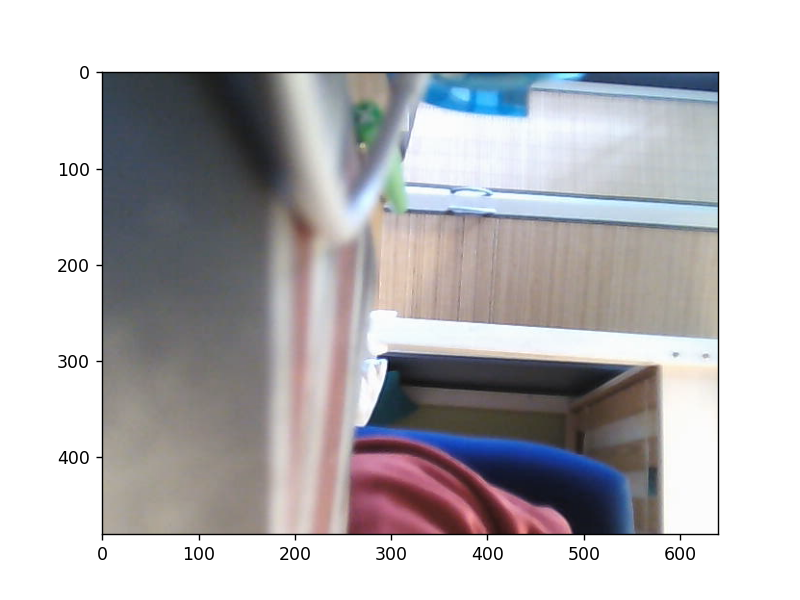

'while is_capturing:\n    try:    # Lookout for a keyboardInterrupt to stop the script\n        is_capturing, frame = vc.read()\n        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored\n        webcam_preview.set_data(frame)\n        plt.draw()\n\n        try:    # Avoids a NotImplementedError caused by `plt.pause`\n            plt.pause(0.05)\n        except Exception:\n            pass\n    except KeyboardInterrupt:\n        vc.release()'

In [3]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

frames.append(frame)
    
"""while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)
        plt.draw()

        try:    # Avoids a NotImplementedError caused by `plt.pause`
            plt.pause(0.05)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()"""

In [16]:
import time
i = 0
webcam_preview.set_data(frames[0])
plt.draw(webcam_preview)

TypeError: draw() takes 0 positional arguments but 1 was given

<IPython.core.display.Javascript object>


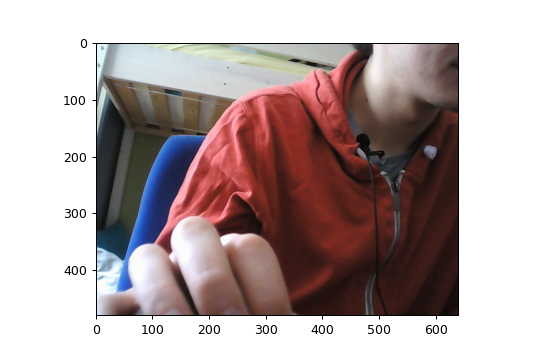

In [35]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

In [9]:
imutils.find_function("blue")

1. CAP_PROP_WHITE_BALANCE_BLUE_U


In [1]:
%config Completer.use_jedi = False
import ipywidgets as widgets
from IPython.display import display
import threading
import cv2
import numpy as np

In [2]:
class VideoPlayer:
    def __init__(self, src):
        self.cap = cv2.VideoCapture(src)
        self.paused = False
        self.frame = None
        self.loop = True
    
    def read(self):
        if self.paused:
            return True, self.frame
        
        ret, self.frame = self.cap.read()
        if self.loop and not ret:
            self.cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            ret, self.frame = cap.read()
        return ret, self.frame
    
    def pause(self):
        if self.frame is None:
            self.read()
        self.paused = not(self.paused)
        
    def stop(self):
        self.cap.release()
        
def convert_single_color(color, convertion_function):
    #Cette couleur est bien convertie, mais les entiers qu'elle contient sont du type np.uint8
    #On souhaite donc les convertir en le type int natif de python.
    converted_color = cv2.cvtColor(np.uint8([[color]]), convertion_function)[0][0]
    return tuple(int(elem) for elem in converted_color)

In [44]:
def balance(sliders, src=0):
    vs = VideoPlayer(src)

    #takes an image, and a lower and upper bound
    #returns only the parts of the image in bounds
    def only_color(frame, color_ranges):
        h_low, s_low, v_low, h_high, s_high, v_high = color_ranges
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower = np.array([h_low, s_low, v_low])
        upper = np.array([h_high, s_high, v_high])
        mask = cv2.inRange(hsv, lower, upper)
        res = cv2.bitwise_and(frame,frame, mask= mask)
        return res, mask

    toggled = True

    while True:
        ret, img = vs.read()
        if not ret:
            break
        h_low = sliders["h_low"].value
        s_low = sliders["s_low"].value
        v_low = sliders["v_low"].value
        h_high = sliders["h_high"].value
        s_high = sliders["s_high"].value
        v_high = sliders["v_high"].value
        speed = sliders["speed"].value

        img2, mask = only_color(img, (h_low, s_low, v_low, h_high, s_high, v_high))

        img_to_draw = img2 if toggled else img

        cv2.namedWindow('img', cv2.WINDOW_NORMAL)
        cv2.imshow('img', img_to_draw)
        k=cv2.waitKey(speed)
        if k==27:
            break
        elif k==ord('p'):
            vs.pause()
        elif k==ord('t'):
            toggled = not(toggled)
            
    print('h_low, s_low, v_low, h_high, s_high, v_high\n{}, {}, {}, {}, {}, {}'.format(
        h_low, s_low, v_low, h_high, s_high, v_high))

    vs.stop()
    cv2.destroyAllWindows()

In [45]:
layout = widgets.Layout(width='50%')

#Utiliser des IntRangeSlider ?
h_low  = widgets.IntSlider(value=0, min=0, max=179, description='h_low:', layout=layout)
s_low  = widgets.IntSlider(value=0, min=0, max=255, description='s_low:', layout=layout)
v_low  = widgets.IntSlider(value=0, min=0, max=255, description='v_low:', layout=layout)
h_high = widgets.IntSlider(value=179, min=0, max=179, description='h_high:', layout=layout)
s_high = widgets.IntSlider(value=255, min=0, max=255, description='s_high:', layout=layout)
v_high = widgets.IntSlider(value=255, min=0, max=255, description='v_high:', layout=layout)
speed = widgets.IntSlider(value=30, min=0, max=100, description='speed:', layout=layout)

sliders_dict = {"h_low" : h_low, "s_low" : s_low, "v_low" : v_low,
               "h_high" : h_high, "s_high" : s_high, "v_high" : v_high,
               "speed" : speed}
display(widgets.VBox([h_low, s_low, v_low, h_high, s_high, v_high, speed]))

thread = threading.Thread(target=balance, args=(sliders_dict,), kwargs={'src' : 0})
#balance(sliders_dict, src=0)
thread.start()

h_low, s_low, v_low, h_high, s_high, v_high
0, 0, 0, 179, 255, 255


In [10]:
thread.is_alive()

False

In [24]:
import threading
from IPython.display import display
import ipywidgets as widgets
import time
progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)

def work(progress):
    total = 100
    for i in range(total):
        time.sleep(0.2)
        progress.value = float(i+1)/total

thread = threading.Thread(target=work, args=(progress,))
display(progress)
thread.start()

FloatProgress(value=0.0, max=1.0)

In [34]:
thread.is_alive()

False

In [6]:
a = widgets.FileUpload(
    accept='',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=True  # True to accept multiple files upload else False
)
a

FileUpload(value={}, description='Upload', multiple=True)

In [7]:
a.

{'.gitignore': {'metadata': {'name': '.gitignore',
   'type': 'text/plain',
   'size': 97,
   'lastModified': 1621364375778},
  'content': b'\r\n.ipynb_checkpoints/\r\n\r\n__pycache__/\r\n\r\n.vscode/\r\n\r\n*.gv\r\n\r\nautomata-output/\r\n\r\n*.log\r\n\r\n*.aux\r\n'}}

In [16]:
from ipywidgets import interact, Dropdown

geo = {'USA':['CHI','NYC'],'Russia':['MOW','LED']}
countryW = Dropdown(options = geo.keys())
cityW = Dropdown()


@interact(country = countryW, city = cityW)
def print_city(country, city):
    cityW.options = geo[country] # Here is the trick, i.e. update cityW.options based on country, namely countryW.value.
    print(country, city)

interactive(children=(Dropdown(description='country', options=('USA', 'Russia'), value='USA'), Dropdown(descri…

In [18]:
a = widgets.IntSlider(
    value=7,
    min=2,
    description='Any:',
    disabled=False,
    layout=widgets.Layout(width = '200px')
)
display(a)

IntText(value=7, description='Any:', layout=Layout(width='200px'))

In [23]:
a, *_ = (1, 2, 3, 4)
a

1

In [20]:
import ipywidgets as widgets
%config Completer.use_jedi = False
layout = widgets.Layout(width='50%')
button_layout = widgets.Layout(width = '40px')

#Utiliser des IntRangeSlider ?
h_low  = widgets.IntSlider(value=0, min=0, max=179, description='h_low :', layout=layout)
s_low  = widgets.IntSlider(value=0, min=0, max=255, description='s_low :', layout=layout)
v_low  = widgets.IntSlider(value=0, min=0, max=255, description='v_low :', layout=layout)
h_high = widgets.IntSlider(value=179, min=0, max=179, description='h_high :', layout=layout)
s_high = widgets.IntSlider(value=255, min=0, max=255, description='s_high :', layout=layout)
v_high = widgets.IntSlider(value=255, min=0, max=255, description='v_high :', layout=layout)
speed = widgets.IntSlider(value=30, min=0, max=100, description='speed :', layout=layout)

name_ball = widgets.Text(placeholder='Name ball color')
add_ball = widgets.Button(icon='plus', layout=button_layout)
remove_ball = widgets.Button(icon='remove', layout=button_layout)
modify_ball = widgets.Button(icon='refresh', layout=button_layout)
count = widgets.IntSlider(value=1, min=0, max=3, description='count :', layout=layout)

dropdown = widgets.Dropdown(options=["Jaune", "Vert", "Bleu"])

"""display(dropdown)
display(widgets.HBox([widgets.Label("Balle :"), name_ball, add_ball, remove_ball, modify_ball]))
display(widgets.VBox([h_low, s_low, v_low, h_high, s_high, v_high, speed]))"""

display(
    widgets.VBox([h_low, s_low, v_low, h_high, s_high, v_high, speed, 
                  widgets.HBox([widgets.Label("Balle :"), name_ball, add_ball, remove_ball, modify_ball]),
                  count,
                  dropdown
                 ])
)

In [94]:
from ipywidgets import Button, Layout

b = Button(description='(50% width, 80px height) button',
           layout=Layout(width='50%', height='80px'))
b

Button(description='(50% width, 80px height) button', layout=Layout(height='80px', width='50%'), style=ButtonS…

In [88]:
help(widgets.Layout)

Help on class Layout in module ipywidgets.widgets.widget_layout:

class Layout(ipywidgets.widgets.widget.Widget)
 |  Layout(*args, **kwargs)
 |  
 |  Layout specification
 |  
 |  Defines a layout that can be expressed using CSS.  Supports a subset of
 |  https://developer.mozilla.org/en-US/docs/Web/CSS/Reference
 |  
 |  When a property is also accessible via a shorthand property, we only
 |  expose the shorthand.
 |  
 |  For example:
 |  - ``flex-grow``, ``flex-shrink`` and ``flex-basis`` are bound to ``flex``.
 |  - ``flex-wrap`` and ``flex-direction`` are bound to ``flex-flow``.
 |  - ``margin-[top/bottom/left/right]`` values are bound to ``margin``, etc.
 |  
 |  Method resolution order:
 |      Layout
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  align_content
 |  
 |  align_items
 

In [58]:
d = InteractiveDropdown()
d.dropdown

Dropdown(description='Balls :', options=(), value=None)

In [61]:
d.add_ball("youpi", 1, 2)

In [ ]:
from ipywidgets import interact, Dropdown

balls = dict()
countryW = Dropdown(options = geo.keys())
cityW = Dropdown()

@interact(country = countryW, city = cityW)
def print_city(country, city):
    cityW.options = geo[country] # Here is the trick, i.e. update cityW.options based on country, namely countryW.value.
    print(country, city)

In [63]:
widgets.ToggleButtons(options = [('', 0), (' ', 1)],
              icons=['play', 'pause'],
              style=widgets.ToggleButtonsStyle(button_width='35px'))

ToggleButtons(icons=('play', 'pause'), options=(('', 0), (' ', 1)), style=ToggleButtonsStyle(button_width='35p…

In [52]:
widgets.ToggleButtons(options=[1, 2, 3])

ToggleButtons(options=(1, 2, 3), value=1)

In [57]:
help(widgets.ToggleButtonsStyle)

Help on class ToggleButtonsStyle in module ipywidgets.widgets.widget_selection:

class ToggleButtonsStyle(ipywidgets.widgets.widget_description.DescriptionStyle, ipywidgets.widgets.widget_core.CoreWidget)
 |  ToggleButtonsStyle(*args, **kwargs)
 |  
 |  Button style widget.
 |  
 |  Parameters
 |  ----------
 |  button_width: str
 |      The width of each button. This should be a valid CSS
 |      width, e.g. '10px' or '5em'.
 |  
 |  font_weight: str
 |      The text font weight of each button, This should be a valid CSS font
 |      weight unit, for example 'bold' or '600'
 |  
 |  Method resolution order:
 |      ToggleButtonsStyle
 |      ipywidgets.widgets.widget_description.DescriptionStyle
 |      ipywidgets.widgets.widget_style.Style
 |      ipywidgets.widgets.widget_core.CoreWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      builtins.object
 

In [61]:
widgets.ToggleButtons(options = [('', 0), (' ', 1), ('  ', 2)], value=1,
              icons=['refresh', 'close', 'arrow-up'],
              style=widgets.ToggleButtonsStyle(button_width='35px'))

ToggleButtons(icons=('refresh', 'close', 'arrow-up'), index=1, options=(('', 0), (' ', 1), ('  ', 2)), style=T…

In [13]:
# import the necessary packages
from collections import deque
from imutils.video import VideoStream
import numpy as np
import cv2
import imutils
import time

#Rajouter count ?
class Ball:
    maxlen = 16
    def __init__(self, color = "white", lower_hsv = (0, 0, 0), higher_hsv = (179, 255, 255)):
        self.color = color
        self.lower_hsv = lower_hsv
        self.higher_hsv = higher_hsv
        self.trail = deque(maxlen = self.maxlen)
        #Les fonctions de dessin d'opencv utilisent RGB
        hsv_trail_color = ((lower_hsv[0] + higher_hsv[0]) // 2, 255, 255)
        self.trail_color = convert_single_color(hsv_trail_color, cv2.COLOR_HSV2BGR)

balls = [Ball(color="red", lower_hsv=(0, 111, 125), higher_hsv=(7, 184, 255)),
        Ball(color="yellow", lower_hsv=(17, 75, 145), higher_hsv=(38, 149, 207)),
        Ball(color="blue", lower_hsv=(95, 46, 55), higher_hsv=(119, 207, 194))]

vs = VideoPlayer(0)
switch = 0
toggled = True
cv2.namedWindow('Frame', cv2.WINDOW_NORMAL)
#ATTENTION A LOOP !
data_x = {ball.color : [] for ball in balls}
data_y = {ball.color : [] for ball in balls}
data_time = []

while True:
    ret, frame = vs.read()
    if not ret:
        break
    data_time.append(vs.cap.get(cv2.CAP_PROP_POS_MSEC))
    
    frame = imutils.resize(frame, width=600)
    blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    # construct a mask for the color "green", then perform a series of dilations
    # and erosions to remove any small blobs left in the mask

    for ball in balls:
        mask1 = cv2.inRange(hsv, ball.lower_hsv, ball.higher_hsv)
        mask2 = cv2.erode(mask1, None, iterations=2)
        mask3 = cv2.dilate(mask2, None, iterations=2)
        # find contours in the mask and initialize the current (x, y) center of the ball
        cnts = cv2.findContours(mask3.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        center = None
        # only proceed if at least one contour was found
        if len(cnts) > 0:
            # find the largest contour in the mask, then use it to compute the minimum 
            # enclosing circle and centroid
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            data_x[ball.color].append(x)
            data_y[ball.color].append(y)
            M = cv2.moments(c)
            center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
            # only proceed if the radius meets a minimum size
            if radius > 10:
                # draw the circle and centroid on the frame, then update the list of tracked points
                if toggled :
                    cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
                    #cv2.circle(frame, center, 5, (0, 0, 255), -1)
        # update the points queue
        ball.trail.appendleft(center)
            # loop over the set of tracked points
        for i in range(1, len(ball.trail)):
            # if either of the tracked points are None, ignore them
            if ball.trail[i - 1] is None or ball.trail[i] is None:
                continue
            # otherwise, compute the thickness of the line and draw the connecting lines
            thickness = int(np.sqrt(Ball.maxlen / float(i + 1)) * 2.5)
            if toggled:
                cv2.line(frame, ball.trail[i - 1], ball.trail[i], ball.trail_color, thickness)
    # show the frame to our screen
    t = {0:frame, 1:blurred, 2:hsv, 3:mask1, 4:mask2, 5:mask3}
    cv2.imshow("Frame", t[switch])
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
    if key == ord('p'):
        vs.pause()
    if key == ord('s'):
        switch = (switch + 1) % len(t)
    if key == ord('t'):
        toggled = not(toggled)
vs.stop()
cv2.destroyAllWindows()

In [ ]:
#se poser la question de quel colorspace ?

In [10]:
%config Completer.use_jedi = False

In [ ]:
imutils.meta

In [18]:
%config Completer.use_jedi = False
import ipywidgets as widgets
from IPython.display import display
import threading
import cv2
import numpy as np
import imutils
import time

In [2]:
#implémanter threading un jour ?
class VideoPlayer:
    def __init__(self, source):
        self.cap = cv2.VideoCapture(source)
        self.paused = False
        self.frame = None
        self.loop = True
    
    def read(self):
        """if not self.cap.isopened():
            return False, None"""
        
        if self.paused:
            return True, self.frame

        ret, self.frame = self.cap.read()
        if self.loop and not ret:
            self.restart()
            ret, self.frame = self.cap.read()
        return ret, self.frame
        
    def pause(self):
        if self.frame is None:
            self.read()
        self.paused = not(self.paused)
        
    def stop(self):
        self.cap.release()
    
    def restart(self):
        self.cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        #Si en pause, on change l'image renvoyée
        if self.paused:
            _, self.frame = self.cap.read()
    
    def get_time(self):
        return self.cap.get(cv2.CAP_PROP_POS_MSEC)
        
def convert_single_color(color, convertion_function):
    #Cette couleur est bien convertie, mais les entiers qu'elle contient sont du type np.uint8
    #On souhaite donc les convertir en le type int natif de python.
    converted_color = cv2.cvtColor(np.uint8([[color]]), convertion_function)[0][0]
    return tuple(int(elem) for elem in converted_color)

In [8]:
vp = VideoPlayer('chant_cut.mp4')
def test(vp):
    cv2.namedWindow('test', cv2.WINDOW_NORMAL)
    _, _, window_width, window_height = cv2.getWindowImageRect('test')
    video_width = vp.cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    video_height = vp.cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    print("'test', {}, {}, {}, {}".format(video_width, video_height, window_width, window_height))
    cv2.resizeWindow('test', int(video_width//2.6), int(video_height//2.6))
    while True:
        
        r, f = vp.read()
        if not r:
            break
        cv2.imshow("test", f)
        if cv2.waitKey(1) == 27: #27 correspond au code de la touche Echap.
            break
    cv2.destroyAllWindows()

In [9]:
import threading
thread = threading.Thread(target=test, args=(vp, ))
thread.start()

'test', 1920.0, 1080.0, 738, 415


In [6]:
test(vp)

In [28]:
vp.restart()

In [5]:
video_width, video_height = vp.cap.get(cv2.CAP_PROP_FRAME_WIDTH), vp.cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

In [13]:
int(video_width)//3

548.0

In [7]:
imutils.find_function('window')

1. WINDOW_AUTOSIZE
2. WINDOW_FREERATIO
3. WINDOW_FULLSCREEN
4. WINDOW_GUI_EXPANDED
5. WINDOW_GUI_NORMAL
6. WINDOW_KEEPRATIO
7. WINDOW_NORMAL
8. WINDOW_OPENGL
9. createHanningWindow
10. destroyAllWindows
11. destroyWindow
12. getWindowImageRect
13. getWindowProperty
14. moveWindow
15. namedWindow
16. resizeWindow
17. setWindowProperty
18. setWindowTitle
19. startWindowThread


In [11]:
help(cv2.createHanningWindow)

Help on built-in function createHanningWindow:

createHanningWindow(...)
    createHanningWindow(winSize, type[, dst]) -> dst
    .   @brief This function computes a Hanning window coefficients in two dimensions.
    .   
    .   See (http://en.wikipedia.org/wiki/Hann_function) and (http://en.wikipedia.org/wiki/Window_function)
    .   for more information.
    .   
    .   An example is shown below:
    .   @code
    .       // create hanning window of size 100x100 and type CV_32F
    .       Mat hann;
    .       createHanningWindow(hann, Size(100, 100), CV_32F);
    .   @endcode
    .   @param dst Destination array to place Hann coefficients in
    .   @param winSize The window size specifications (both width and height must be > 1)
    .   @param type Created array type



In [1]:
#test enregistrement
from videoplayer import VideoPlayer
import cv2
vp = VideoPlayer(0)
def test(vp):
    cv2.namedWindow('test', cv2.WINDOW_NORMAL)
    while True:
        r, f = vp.read()
        if not r:
            break
        cv2.imshow("test", f)
        k = cv2.waitKey(1)
        if k == 27: #27 correspond au code de la touche Echap.
            break
        elif k == ord('r'):
            vp.start_recording('test.avi')
        elif k == ord('t'):
            vp.pause_recording()
        elif k == ord('s'):
            vp.stop_recording()
        elif k == ord('p'):
            vp.pause()
    vp.stop()
    cv2.destroyAllWindows()

In [ ]:
test(vp)

In [2]:
import threading
thread = threading.Thread(target=test, args=(vp, ))
thread.start()

In [15]:
a = vp.get_time()

In [16]:
b = vp.get_time()

In [17]:
a - b

-9533.333400011063